In [192]:
!pip install squarify
! pip install missingno
%matplotlib inline
! pip install joypy

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import pyplot as plt
import matplotlib as mpl
from scipy import stats as st
from functools import reduce
import numpy as np
from math import factorial
from scipy.stats import norm
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter
import seaborn as sns
import squarify
from joypy import joyplot
import joypy
import missingno as msno

**Name:** _Marcel Damas_   
**E-Mail:** _marcel-spanien@hotmail.de_ 

## Project goal 

Is an analysis for the Ice online shop that sells video games around the world. The aim is to find out whether a game is successful or not. This is done by identifying patterns. The aim of the analysis is to identify the potential big winners in order to plan for these advertising campaigns.   

   
<a name="table_of_contents"></a> 

## Table of contents  

Instructions on completing the project   

**Step 1. Open the data file and study the general information**  
[click here](#Step_1)   

File path:
/datasets/games.csv  
[Download dataset](https://practicum.yandex.com/learn/practicum100-da/courses/b2b38eb7-f761-498a-b880-c0983a799349/sprints/4613/topics/491082d1-1df5-40b2-a89e-12176880e89d/lessons/f3e743c5-d234-4b86-ab25-ccff6e40709f/)

**Step 2. Prepare the data**

   * Replace the column names (make them lowercase). [click here](#Step_2.1)   
   * Convert the data to the required types. [click here](#Step_2.2)   
   * Describe the columns where the data types have been changed and why. [click here](#Step_2.3) 
   * If necessary, decide how to deal with missing values: [click here](#Step_2.4) 
   * Explain why you filled in the missing values as you did or why you decided to leave them blank. [click here](#Step_2.5) 
   * Why do you think the values are missing? Give possible reasons. [click here](#Step_2.6) 
   * Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.[click here](#Step_2.7) 
   * Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.[click here](#Step_2.8) 

**Step 3. Analyze the data**  

  * Look at how many games were released in different years. Is the data for every period significant?[click here](#Step_3.1) 
  * Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade? [click here](#Step_3.2) 
  * Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017. [click here](#Step_3.3) 
  * Work only with the data that you've decided is relevant. Disregard the data for previous years. [click here](#Step_3.4) 
  * Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms. [click here](#Step_3.5) 
  * Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings. [click here](#Step_3.6) 
  * Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions. [click here](#Step_3.7) 
  * Keeping your conclusions in mind, compare the sales of the same games on other platforms. [click here](#Step_3.8)
  * Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales? [click here](#Step_3.9)

**Step 4. Create a user profile for each region**

For each region (NA, EU, JP), determine:

   * The top five platforms. Describe variations in their market shares from region to region. [click here](#Step_4.1)
   * The top five genres. Explain the difference. [click here](#Step_4.2)
   * Do ESRB ratings affect sales in individual regions? [click here](#Step_4.3)

**Step 5. Test the following hypotheses:** 

  * Average user ratings of the Xbox One and PC platforms are the same. [click here](#Step_5.1)
  * Average user ratings for the Action and Sports genres are different. [click here](#Step_5.2)
  
 Set the alpha threshold value yourself.  
 
 Explain:    
 
 
  * How you formulated the null and alternative hypotheses [click here](#Step_5.2)
  * What significance level you chose to test the hypotheses, and why [click here](#Step_5.2)

**Step 6. Write a general conclusion**

**Format:** Complete the task in the Jupyter Notebook. Insert the programming code in the code cells and text explanations in the markdown cells. Apply formatting and add headings.[click here](#Step_6)

<a name="Step_1"></a>  

**Step 1. Open the data file and study the general information** 

Back to the table of contents [click here](#table_of_contents)   

In [194]:
games = pd.read_csv('games.csv')
print('Rows and columns:',games.shape)
print()
print(games.dtypes)
games.head()

Rows and columns: (16715, 11)

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a name="Step_2.1"></a> 

**Step 2. Prepare the data**

   * Replace the column names (make them lowercase).   
   
Back to the table of contents [click here](#table_of_contents) 

First we look at all of the Columns.

In [195]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Now we want to replace the column names and make them lowercase.

In [196]:
#make the headings small 
games.columns =[x.lower() for x in games.columns]#or .upper()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


I find it clearer if the column name says games name I change this now also briefly 

In [197]:
games.rename(columns= {'name':'games_name'},inplace=True)
games.head()

,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Conclusion:** 

The headings or columns are now lowercase and I have renamed the column name to games name. 

<a name="Step_2.2"></a> 

**Step 2. Prepare the data**

   * Convert the data to the required types.
   
Back to the table of contents [click here](#table_of_contents) 

As we have already seen above, the table have object and float64 in the columns. We will now take a closer look at which we have to change 

In [198]:
print(games.dtypes)
games.head()

games_name          object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [199]:
games.head()

,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [200]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Conclusion:** 

As we can see the column user_score is an object it should be a float and the year_of_release column is not a time type ore a int. Because we have many missing values, we should take care of them first. 

<a name="Step_2.3"></a> 

Step 2. Prepare the data  

   * Describe the columns where the data types have been changed and why.   

Back to the table of contents [click here](#table_of_contents) 

**Conclusion:**   

After we have taken care of the missing values, we will change the years to whole years in int so that this becomes clearer. We will also take care of the User Score column since we have values with tbd and see what we will do with the missing ones in this column, but we will first take care of it and then of the data types since we can not switch data types with missing values in Int or float.
We will do this because it is much easier to work with the data and analyze it once we have done our preliminary work. 

<a name="Step_2.4"></a> 

**Step 2. Prepare the data**

   * If necessary, decide how to deal with missing values: [click here](#Step_2.4)  
       
Back to the table of contents [click here](#table_of_contents) 

Let's get an overview of the missing values 

In [201]:
print("Get an overview of missing values")
print()
print("only missing values")
print(games.isnull().sum())
print()
print("values that are not missing")
print(games.count())

Get an overview of missing values

only missing values
games_name            2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

values that are not missing
games_name         16713
platform           16715
year_of_release    16446
genre              16713
na_sales           16715
eu_sales           16715
jp_sales           16715
other_sales        16715
critic_score        8137
user_score         10014
rating              9949
dtype: int64


<a name="library"></a>

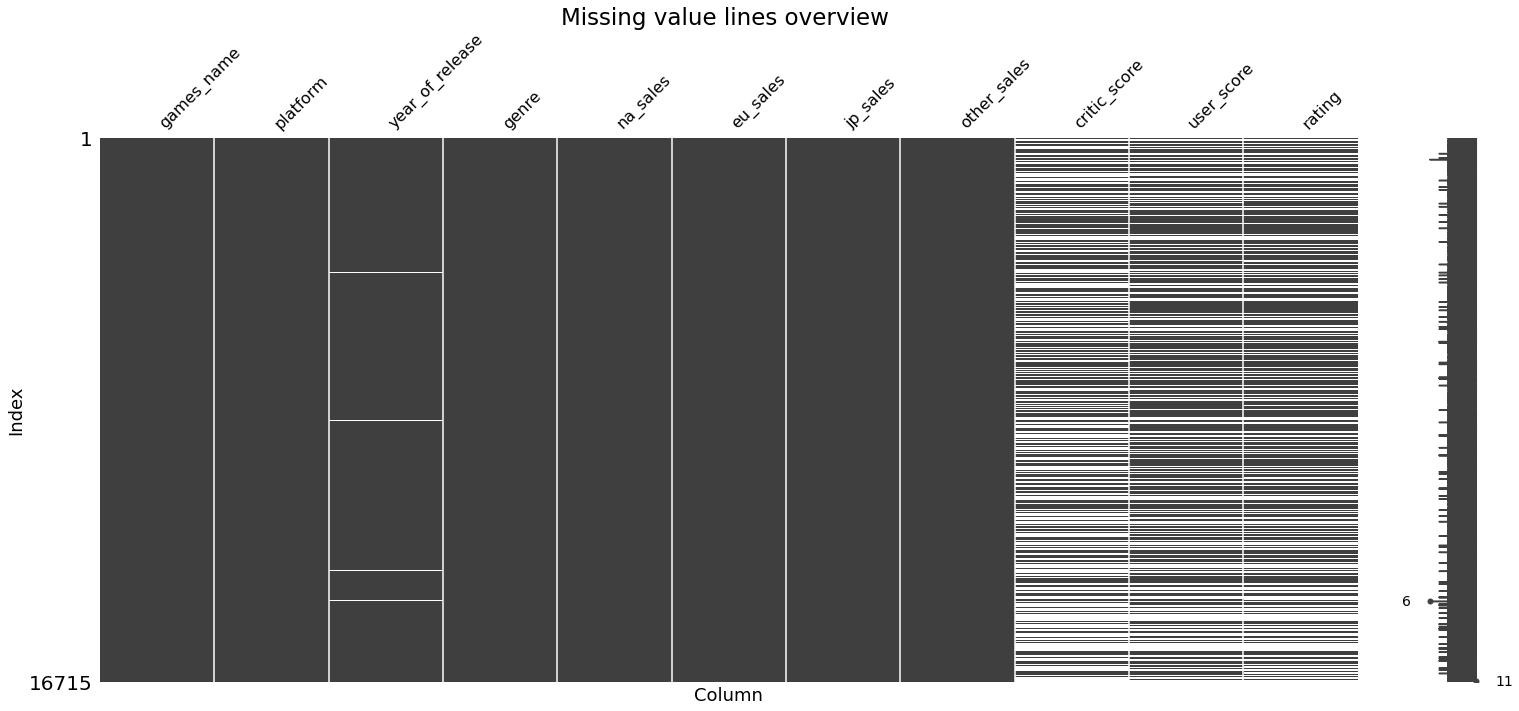

In [202]:
msno.matrix(games)
plt.title("Missing value lines overview ",fontdict={'size':23})
plt.xlabel("Column",fontdict={'size':18})
plt.ylabel("Index",fontdict={'size':18})
plt.show()

The missing values in critic_score, user_score and rating seem to correlate with each other. We want to take a closer look at that. 

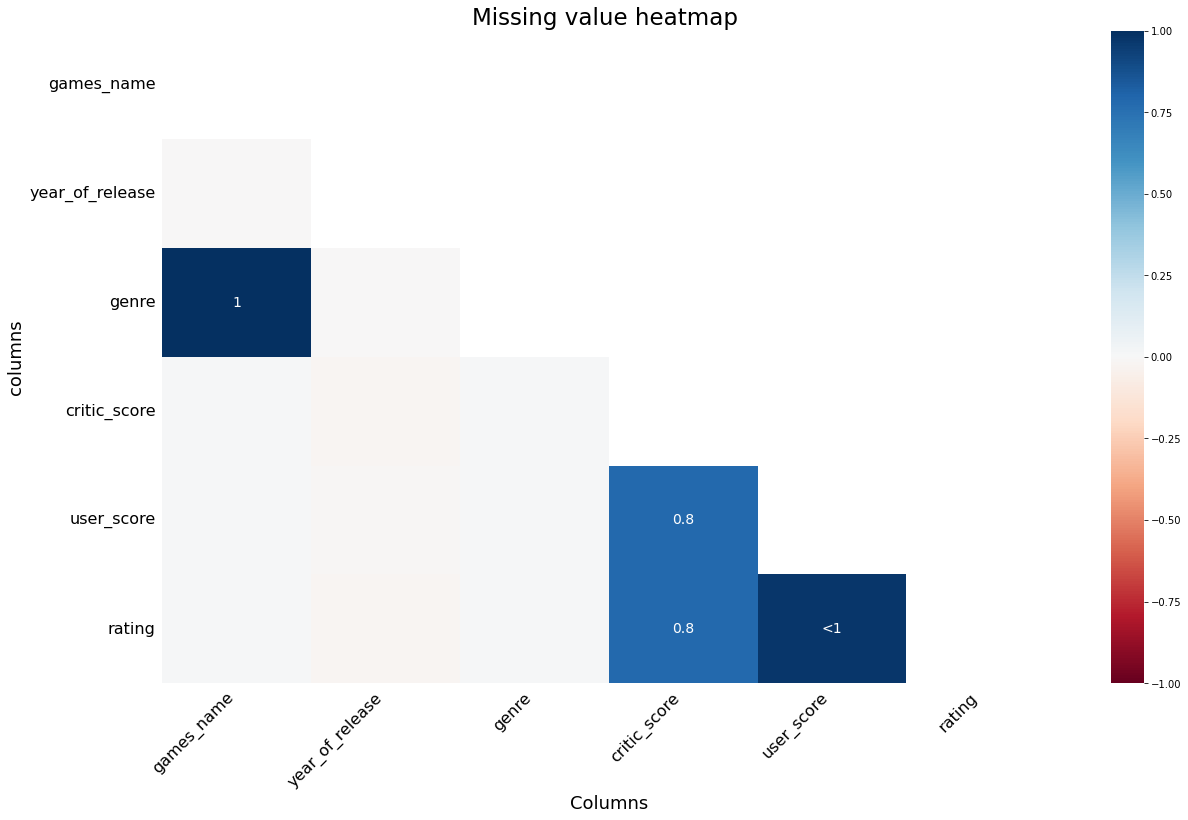

In [203]:
msno.heatmap(games)
plt.title("Missing value heatmap ",fontdict={'size':23})
plt.xlabel("Columns",fontdict={'size':18})
plt.ylabel("columns",fontdict={'size':18})
plt.show()

The darker the color, the more certain is a correlation blue for positive and rod for degative corolation. In our case there is a positive corolation of the missing values between the genre, user_score and citic score. 


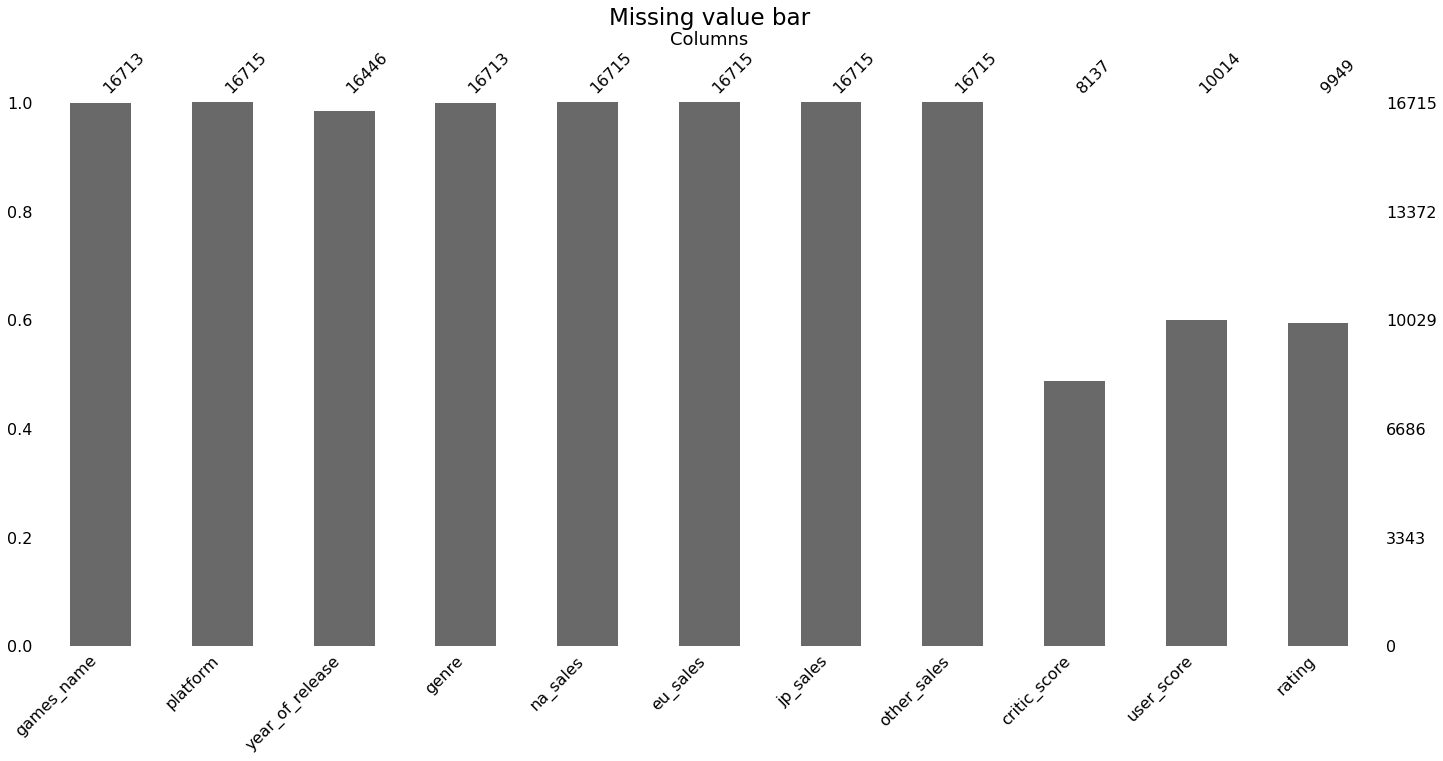

In [204]:
msno.bar(games)
plt.title("Missing value bar",fontdict={'size':23})
plt.xlabel("Columns",fontdict={'size':18})
plt.ylabel("% & Number of values ",fontdict={'size':18})
plt.show()

Here we see how many values are missing.

First we take a closer look at the two missing values in games name.

In [205]:
games[games["games_name"].isnull()]

,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


By the two of them are missing a lot of values it also seems to be very old games that are not particularly successful they are not important and we are missing too many values we will give up the two and throw them out 

In [206]:
games.dropna(subset=["games_name"], how='all',inplace=True)

Now let's take a closer look at others. 

In [207]:
print("Get an overview of missing values")
print()
print("only missing values")
print(games.isnull().sum())
print()
print("values that are not missing")
print(games.count())

Get an overview of missing values

only missing values
games_name            0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

values that are not missing
games_name         16713
platform           16713
year_of_release    16444
genre              16713
na_sales           16713
eu_sales           16713
jp_sales           16713
other_sales        16713
critic_score        8137
user_score         10014
rating              9949
dtype: int64


We will not be able to reconstruct the age either, it is around 1% of the values we will also drop these 269 values. 

In [208]:
games["games_name"].count()#check

16713

In [209]:
games.dropna(subset=['year_of_release'],how='all', inplace=True)#drop

In [210]:
games["games_name"].count()#check 16713-16444= 269

16444

Now we can turn the year_of_release into real years. 

In [211]:
games['year_of_release'] = games['year_of_release'].astype(int)
games['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

Looks a lot better. Now let's look at the ESRB rating column. 

In [212]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

A bit confused what do the letters mean? To get a better understanding let's take a look at how ESRB rates it. [click here to see it](https://www.esrb.org/ratings-guide/)  
Okey much better unfortunately not all are there but at least we got a rough understanding of what this is about and what the most important values are. Let's look at the missing two [EC click](https://www.mobygames.com/attribute/sheet/attributeId,89/) and [K-A click](https://memory-alpha.fandom.com/wiki/Entertainment_Software_Rating_Board). I make a list for an easier overview. 
  * EC = means content ist suitable for Early Childhood
  * E = Means content is suitable for all ages. 
  * E10+ = Means content is suitable for all of 10 yeas and over it.
  * K-A For content suitable for persons ages 6 and older. Replaced by "E" in 1998 
  * T = Means content is suitable for all 13 yeas and over it. 
  * M = Means content is suitable for all 17 yeas and over it. 
  * A0 = Means content is suitable for all 18 yeas and over it. 
  * RP = Means content has no rating yet.  
  
We can also summarize the ratings of EC and KA under E because they are the same. This slightly reduces the number of reviews. 

👍🏿

In [213]:
games['rating'].replace(['EC','K-A'],'E',inplace=True)
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'RP'], dtype=object)

Now the list looks much better, maybe we can do something with the missing values 

In [214]:
games[games['rating'].isnull()].head()

,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [215]:
display(games[games['rating']=='E'].head())
display(games[games['rating']=='E10+'].head())
display(games[games['rating']=='T'].head())
display(games[games['rating']=='M'].head())
display(games[games['rating']=='AO'].head())

,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E


,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
61,Just Dance 3,Wii,2011,Misc,5.95,3.11,0.00,1.06,74.0,7.8,E10+
68,Just Dance 2,Wii,2010,Misc,5.80,2.85,0.01,0.78,74.0,7.3,E10+
103,Just Dance,Wii,2009,Misc,3.48,2.99,0.00,0.73,49.0,8,E10+
116,Just Dance 4,Wii,2012,Misc,4.05,2.16,0.00,0.55,74.0,7.3,E10+
141,Kinect Sports,X360,2010,Sports,3.92,1.73,0.03,0.51,73.0,7.4,E10+


,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
39,Super Smash Bros. Brawl,Wii,2008,Fighting,6.62,2.55,2.66,1.01,93.0,8.9,T
65,Final Fantasy VII,PS,1997,Role-Playing,3.01,2.47,3.28,0.96,92.0,9.2,T
67,Gran Turismo 2,PS,1999,Racing,3.88,3.42,1.69,0.50,93.0,9,T
84,Final Fantasy X,PS2,2001,Role-Playing,2.91,2.07,2.73,0.33,92.0,8.7,T
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T


,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M


,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO


We take another look at what genre there are. 

In [216]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

We see there is only one game over 18. The games in E and E10 + are games that are Sports, Racing, Misc, Platform games and Puzzle. For T the games are fighting, role-playing, racing, simulation and Strategy. and for M Action, Shooter. So we could put the missing values in categories.

In [217]:
display(games[games['genre']=='Sports'].head(10))
display(games[games['genre']=='Platform'].head(10))
display(games[games['genre']=='Role-Playing'].head(10))
display(games[games['genre']=='Misc'].head(10))
display(games[games['genre']=='Shooter'].head(10))
display(games[games['genre']=='Simulation'].head(10))
display(games[games['genre']=='Action'].head(10))
display(games[games['genre']=='Fighting'].head(10))
display(games[games['genre']=='Adventure'].head(10))
display(games[games['genre']=='Strategy'].head(10))
display(games[games['genre']=='Puzzle'].head(10))
display(games[games['genre']=='Racing'].head(10))

,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E
86,Mario & Sonic at the Olympic Games,Wii,2007,Sports,2.57,3.86,0.66,0.91,NaN,NaN,NaN
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5,E
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
122,FIFA 12,PS3,2011,Sports,0.84,4.30,0.11,1.39,NaN,NaN,NaN
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E


,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
45,Super Mario 64,N64,1996,Platform,6.91,2.85,1.91,0.23,NaN,NaN,NaN
49,Super Mario Galaxy,Wii,2007,Platform,6.06,3.35,1.20,0.74,97.0,8.9,E
53,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.0,8.4,E
56,Super Mario All-Stars,SNES,1993,Platform,5.99,2.15,2.12,0.29,NaN,NaN,NaN


,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,NaN,NaN,NaN
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN
30,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,5.89,5.04,3.12,0.59,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN
58,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,4.34,2.65,3.15,0.35,NaN,NaN,NaN
65,Final Fantasy VII,PS,1997,Role-Playing,3.01,2.47,3.28,0.96,92.0,9.2,T


,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E
61,Just Dance 3,Wii,2011,Misc,5.95,3.11,0.00,1.06,74.0,7.8,E10+
68,Just Dance 2,Wii,2010,Misc,5.80,2.85,0.01,0.78,74.0,7.3,E10+
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN
74,Mario Party DS,DS,2007,Misc,4.40,1.85,1.98,0.68,72.0,7.8,E
79,Wii Party,Wii,2010,Misc,1.75,3.47,2.49,0.67,68.0,7.4,E
80,Mario Party 8,Wii,2007,Misc,3.74,2.24,1.58,0.70,62.0,6.3,E
103,Just Dance,Wii,2009,Misc,3.48,2.99,0.00,0.73,49.0,8,E10+


,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
36,Call of Duty: Modern Warfare 2,X360,2009,Shooter,8.52,3.59,0.08,1.28,94.0,6.3,M
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
44,Halo 3,X360,2007,Shooter,7.97,2.81,0.13,1.21,94.0,7.8,M


,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
43,Animal Crossing: Wild World,DS,2005,Simulation,2.50,3.45,5.33,0.86,86.0,8.7,E
73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T
156,Cooking Mama,DS,2006,Simulation,3.07,1.91,0.07,0.57,67.0,7.2,E
184,Tomodachi Life,3DS,2013,Simulation,0.97,2.11,1.90,0.24,NaN,NaN,NaN
195,Microsoft Flight Simulator,PC,1996,Simulation,3.22,1.69,0.00,0.20,NaN,NaN,NaN
230,Animal Crossing: City Folk,Wii,2008,Simulation,1.82,1.12,1.32,0.36,73.0,7.6,E
318,Nintendogs + cats,3DS,2011,Simulation,1.44,1.41,0.73,0.27,NaN,NaN,NaN
330,The Sims: Unleashed,PC,2002,Simulation,2.03,1.56,0.00,0.17,79.0,8,T


,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,4.34,2.71,3.96,0.76,NaN,NaN,NaN
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E


,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
39,Super Smash Bros. Brawl,Wii,2008,Fighting,6.62,2.55,2.66,1.01,93.0,8.9,T
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN
106,Tekken 3,PS,1998,Fighting,3.27,2.22,1.40,0.29,96.0,9.1,T
111,Super Smash Bros. Melee,GC,2001,Fighting,4.41,1.04,1.39,0.22,92.0,9.1,T
137,Street Fighter II: The World Warrior,SNES,1992,Fighting,2.47,0.83,2.87,0.12,NaN,NaN,NaN
153,Tekken 2,PS,1996,Fighting,2.26,1.89,1.36,0.23,89.0,8.9,T
158,Super Smash Bros.,N64,1999,Fighting,2.95,0.60,1.97,0.04,NaN,NaN,NaN
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,NaN,NaN,NaN
280,Street Fighter IV,PS3,2009,Fighting,2.03,1.04,0.58,0.52,94.0,7.3,T
287,Street Fighter II Turbo,SNES,1992,Fighting,1.42,0.51,2.10,0.07,NaN,NaN,NaN


,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
50,Super Mario Land 2: 6 Golden Coins,GB,1992,Adventure,6.16,2.04,2.69,0.29,NaN,NaN,NaN
160,Assassin's Creed,X360,2007,Adventure,3.28,1.64,0.07,0.56,81.0,7.7,M
219,Assassin's Creed,PS3,2007,Adventure,1.91,2.00,0.09,0.82,81.0,7.3,M
252,Zelda II: The Adventure of Link,NES,1987,Adventure,2.19,0.50,1.61,0.08,NaN,NaN,NaN
402,Rugrats: Search For Reptar,PS,1998,Adventure,1.63,1.53,0.00,0.18,NaN,NaN,NaN
433,L.A. Noire,PS3,2011,Adventure,1.27,1.29,0.12,0.49,89.0,7.7,M
437,Club Penguin: Elite Penguin Force,DS,2008,Adventure,1.87,0.97,0.00,0.30,NaN,8,E
463,Heavy Rain,PS3,2010,Adventure,1.29,1.21,0.06,0.47,87.0,7.7,M
521,Myst,PC,1994,Adventure,0.02,2.79,0.00,0.00,NaN,NaN,NaN
556,L.A. Noire,X360,2011,Adventure,1.52,0.92,0.02,0.24,89.0,7.8,M


,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
168,Pokemon Stadium,N64,1999,Strategy,3.18,1.24,0.94,0.09,NaN,NaN,NaN
206,Warzone 2100,PS,1999,Strategy,2.79,1.89,0.00,0.33,NaN,NaN,NaN
218,StarCraft II: Wings of Liberty,PC,2010,Strategy,2.57,1.68,0.00,0.58,93.0,8.2,T
273,Warcraft II: Tides of Darkness,PC,1995,Strategy,1.70,2.27,0.00,0.23,NaN,NaN,NaN
339,Pokémon Trading Card Game,GB,1998,Strategy,1.49,0.73,1.38,0.10,NaN,NaN,NaN
510,Command & Conquer: Red Alert,PC,1996,Strategy,1.37,1.34,0.00,0.14,NaN,NaN,NaN
549,Pokémon Stadium 2,N64,2000,Strategy,1.02,0.36,1.13,0.23,NaN,NaN,NaN
582,Halo Wars,X360,2009,Strategy,1.54,0.80,0.04,0.24,82.0,7.2,T
656,Theme Hospital,PC,1997,Strategy,2.30,0.10,0.00,0.00,NaN,9,E
803,Sim Theme Park,PC,1998,Strategy,2.04,0.04,0.00,0.00,NaN,8.3,E


,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
26,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,3.43,5.35,5.32,1.18,77.0,7.1,E
89,Pac-Man,2600,1982,Puzzle,7.28,0.45,0.00,0.08,NaN,NaN,NaN
157,Tetris,NES,1988,Puzzle,2.97,0.69,1.81,0.11,NaN,NaN,NaN
172,Dr. Mario,GB,1989,Puzzle,2.18,0.96,2.00,0.20,NaN,NaN,NaN
188,Professor Layton and the Curious Village,DS,2007,Puzzle,1.21,2.43,1.03,0.52,85.0,8.6,E
217,Dr. Mario,NES,1990,Puzzle,2.62,0.60,1.52,0.10,NaN,NaN,NaN
308,Professor Layton and the Diabolical Box,DS,2007,Puzzle,0.90,1.76,0.92,0.37,84.0,8.8,E10+
415,Professor Layton and the Unwound Future,DS,2008,Puzzle,0.60,1.57,0.82,0.27,86.0,9.2,E10+
489,Pac-Man Collection,GBA,2001,Puzzle,2.07,0.77,0.05,0.05,79.0,7.8,E


,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E
52,Gran Turismo,PS,1997,Racing,4.02,3.87,2.54,0.52,96.0,8.7,E
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E
63,Mario Kart 64,N64,1996,Racing,5.55,1.94,2.23,0.15,NaN,NaN,NaN
67,Gran Turismo 2,PS,1999,Racing,3.88,3.42,1.69,0.50,93.0,9,T
76,Super Mario Kart,SNES,1992,Racing,3.54,1.24,3.81,0.18,NaN,NaN,NaN


We are now sorting according to which category makes sense for which age and because most of these ratings are in this category.   
Sports = E  
Platform = E  
Racing = E  
Role-Playing = T  
Puzzle = E or E10+  
Misc = E10+  
Shooter = M  
Simulation = E  
Action = M  
Fighting = T  
Adventure = M  
Strategy = T  

In [218]:
rating_dic={'Sports':'E',
            'Platform':'E',
            'Role-Playing':'T',
            'Misc':'E10+',
            'Shooter':'M',
            'Simulation':'E',
            'Action':'M',
            'Fighting':'T',
            'Adventure':'M',
            'Strategy':'T',
            'Puzzle':'E10+',
            'Racing':'E'
           }

In [219]:
games['rating2']=games.apply(lambda row:rating_dic[row['genre']] \
                            if row ['rating'] is np.nan else row['rating'], axis=1)
games

,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating2
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,T
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,M
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,E
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,M
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,E


**Conclusion:**

Now we have filled in the lines that were in ratings nan values reasonably well, but we have to rake up again here with Ice how it could have happened, whether it was a transmission error or the values were lost or whether they were caused by human error. To fill them up again correctly.  

<a name="Step_2.5"></a> 

**Step 2. Prepare the data**

   * Explain why you filled in the missing values as you did or why you decided to leave them blank. [click here](#Step_2.5)  
    
       
Back to the table of contents [click here](#table_of_contents)               

**Conclusion:**

since i found it most useful to make them dependent on genre. Since the evaluation relates to whether there are sex drugs, violence or other things in it that are not suitable for younger people, and based on the genre, it is possible to assess whether it contains such content that is dangerous for small children. So you can estimate what is suitable for which age I am not a psychologist but in defect the ESRB do nothing other than look at what content is in the game, only that they look at each game much more closely than me. It should only be a rough solution, not a final solution. 

<a name="Step_2.6"></a> 

**Step 2. Prepare the data**

  * Why do you think the values are missing? Give possible reasons. [click here](#Step_2.6)  
  
Back to the table of contents [click here](#table_of_contents)        

This may have several causes it could have errors during the transfer it may be that the games were not rated 
or the ratings were not entered it may be that it was not published for every country and in some countries no ratings are required which reduced then cost for ESRB ratings. For us it is important that we draw attention to it and chop it up so that any missing values that were caused by errors are minimized in the future. It could not have been uploaded in the user reviews, perhaps no rating option was provided for the user to rate, etc.  

<a name="Step_2.7"></a> 

**Step 2. Prepare the data**

   * Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.[click here](#Step_2.7)   
   
Back to the table of contents [click here](#table_of_contents)        

In [220]:
print(games.dtypes)
print()
print('Which values appear in user_score:  One is different --> |tbd|',
      '                                                    ',games['user_score'].unique())

games_name          object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
rating2             object
dtype: object

Which values appear in user_score:  One is different --> |tbd|                                                      ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6'

We have a type (user_score) that should actually be a float or an int but if we try to convert an error would occur because values are still hidden here that are not numbers. 

score_total_PS2['user_score'] = score_total_PS2['user_score'].astype(float)  
ValueError: could not convert string to float: 'tbd'  

We should take a closer look at the one and then decide if they are relevant. 

In [221]:
games[games['user_score']=='tbd']

,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating2
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,E


We can choose different options to fill in the reviews of tbd. Since we have a considerable amount of 2376 values, we have to do something here.  
Since we don't know how the users will rate the games and we don't have enough ratings in critic_score to credit them, we will set the values to a number that does not appear in our ratings so that we can find them again and fill them in later. Here we have to speak with the Ice online shop so that we can later fill in our replacement number with the correct reviews. 

In [222]:
games['user_score'].replace('tbd',15,inplace=True)
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 15, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

We fill the unknown values with 14 until we can find the correct reviews in the archives of Ice. 

In [223]:
games['user_score'] = games['user_score'].fillna(value=14)
games['user_score'].unique()

array(['8', 14, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 15, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

But now we have not yet converted to the correct data type. 

In [224]:
games['user_score'] = games['user_score'].astype(float)
games.dtypes

games_name          object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
rating2             object
dtype: object

Not perfect but much better. 

**Conclusion:**

We looked at what was going on with the values and assigned him a replacement number which we can fill in later as soon as we have the correct values. 

<a name="Step_2.8"></a> 

**Step 2. Prepare the data**

  * Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.[click here](#Step_2.8)   
  
Back to the table of contents [click here](#table_of_contents)          

In [225]:
games['total_sales_all_regions'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating2,total_sales_all_regions
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,14.0,NaN,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,14.0,NaN,T,31.38


**Conclusions:**

We have calculated the sales for all regions and assigned total_sales_all_regions to this column now we can see at a glance how much each game has taken in total. 

<a name="Step_3.1"></a> 
**Step 3. Analyze the data**  

  * Look at how many games were released in different years. Is the data for every period significant?  
 
Back to the table of contents [click here](#table_of_contents)  

In [226]:
games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

In [227]:
game_year=games[['year_of_release','games_name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()
game_year[game_year['year_of_release']!=0].head()

,year_of_release,games_name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


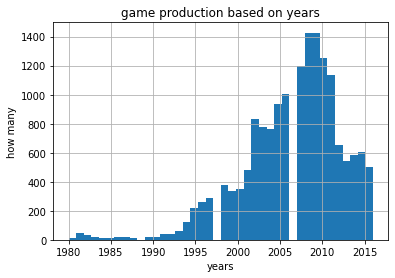

In [228]:
games.hist('year_of_release', bins= 40);
plt.title("game production based on years");
plt.xlabel("years");
plt.ylabel("how many");

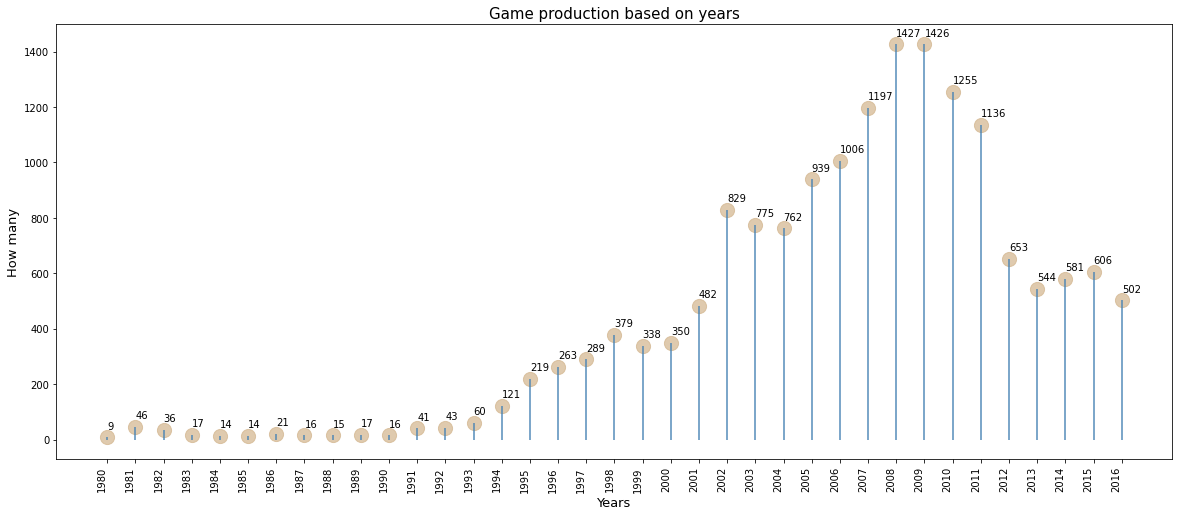

In [229]:
fig,ax=plt.subplots(figsize=(20,8))
ax.vlines(x=game_year['year_of_release'], ymin=0, ymax=game_year['games_name'], color='steelblue',alpha=0.7,linewidth=2)
ax.scatter(x=game_year['year_of_release'], y=game_year['games_name'],s=200,color='tan',alpha=0.7)
ax.set_xticks(game_year['year_of_release'])
ax.set_xticklabels(game_year['year_of_release'], rotation=90,fontdict={'horizontalalignment':'right'} )

for row in game_year.itertuples():
    ax.text(row.year_of_release, row.games_name+30, s=round(row.games_name,2))

plt.title("Game production based on years",fontdict={'size':15})
plt.xlabel("Years",fontdict={'size':13})
plt.ylabel("How many",fontdict={'size':13})
plt.show()

**Conclusion:**

If we look at the games in relation to the time we see that the importance of games increases the more we progress in time, there are always years in which things are not going as well but the trends show that the games more and more evaluations the further the time advances. I conclude that games are being produced in ever larger quantities.  
If we now had a column with the costs, we could see whether the expenditure of the game manufacturers for the production is also increasing more and more. What I suspected might be interesting. Maybe we should ask again here. Whether they could provide us with this table to compare whether there are also games that were cheap and brought in a lot. 

<a name="Step_3.2"></a> 
**Step 3. Analyze the data**  

  * Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?  
 
Back to the table of contents [click here](#table_of_contents)  

In [230]:
platform_total =  games.groupby(['platform'])['total_sales_all_regions'].sum()
print(platform_total)
print()
print('And the winner is the PS2 it achieved the the highest total income of',platform_total.max(),'million USD')

platform
2600      86.48
3DO        0.10
3DS      257.81
DC        15.95
DS       802.78
GB       254.43
GBA      312.88
GC       196.73
GEN       28.35
GG         0.04
N64      218.01
NES      251.05
NG         1.44
PC       255.76
PCFX       0.03
PS       727.58
PS2     1233.56
PS3      931.34
PS4      314.14
PSP      289.53
PSV       53.81
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      891.18
WiiU      82.19
X360     961.24
XB       251.57
XOne     159.32
Name: total_sales_all_regions, dtype: float64

And the winner is the PS2 it achieved the the highest total income of 1233.56 million USD


We have calculated the total prices that were achieved for all platforms on which games can be played and than selected the platform where the turnover was highest.

In [231]:
platform_grp_sales= games[['platform','total_sales_all_regions']].groupby(['platform']).sum().sort_values(by='total_sales_all_regions').reset_index()
platform_grp_sales['total_sales_z_score'] = (platform_grp_sales['total_sales_all_regions']-platform_grp_sales['total_sales_all_regions'].mean()) / platform_grp_sales['total_sales_all_regions'].std()
platform_grp_sales.tail(10)

,platform,total_sales_all_regions,total_sales_z_score
21,3DS,257.81,-0.077116
22,PSP,289.53,0.015105
23,GBA,312.88,0.082992
24,PS4,314.14,0.086655
25,PS,727.58,1.288676
26,DS,802.78,1.507310
27,Wii,891.18,1.764321
28,PS3,931.34,1.881081
29,X360,961.24,1.968011
30,PS2,1233.56,2.759744


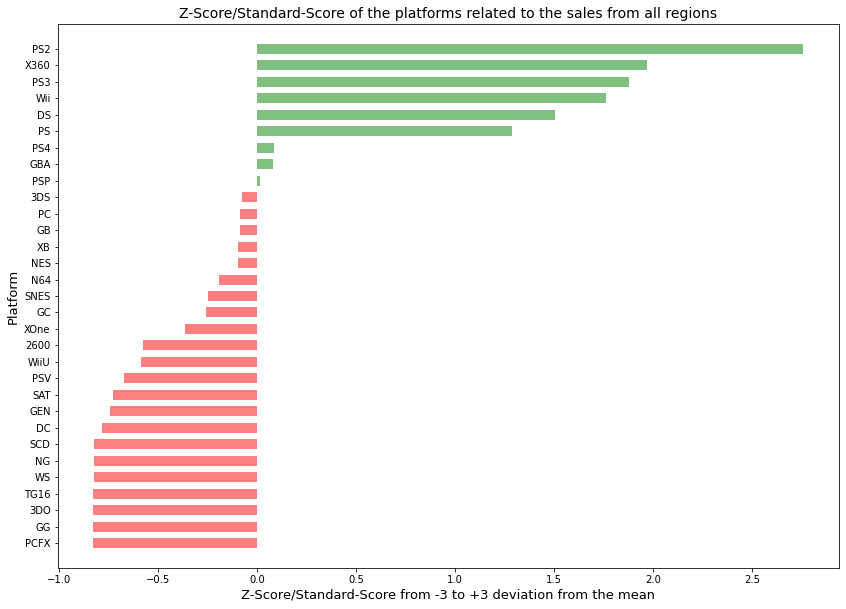

In [232]:
platform_grp_sales['colors']=['red' if x<0 else 'green' for x in platform_grp_sales['total_sales_z_score']]
plt.figure(figsize=(14,10))
plt.hlines(y=platform_grp_sales['platform'], xmax=platform_grp_sales['total_sales_z_score'], xmin=0, color=platform_grp_sales['colors'],alpha=0.5, linewidth=10)
plt.title("Z-Score/Standard-Score of the platforms related to the sales from all regions",fontdict={'size':14})
plt.xlabel("Z-Score/Standard-Score from -3 to +3 deviation from the mean",fontdict={'size':13})
plt.ylabel("Platform",fontdict={'size':13})
plt.show()

The Z-Score or Standard-Score shows how far the value deviates from the mean value. Is the value below the mean value, then the product is not so good in the sales figures, if the product is above the mean value, a positive number it means that the sale of the product has been successful, the higher the value the better is the sales of the product. In our case, the PS2 performed best. 

In [233]:
platform_total = games[['year_of_release','platform', 'total_sales_all_regions']]
total_ps2 = platform_total[platform_total['platform'] == 'PS2']

Annual revenue in million USD
year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales_all_regions, dtype: float64


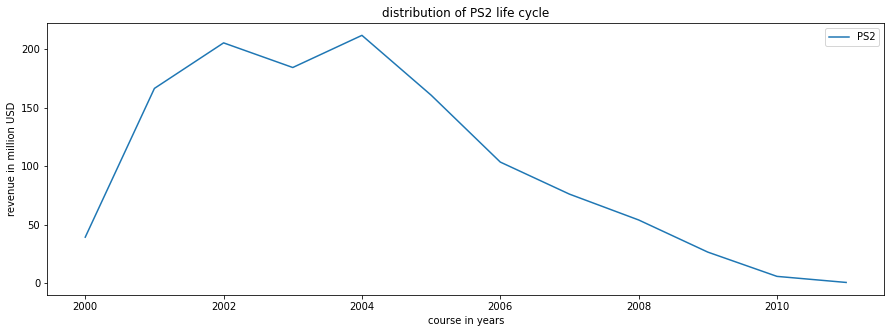

In [234]:
total_ps2_by_year = total_ps2.groupby(['year_of_release'])['total_sales_all_regions'].sum()
print('Annual revenue in million USD')
print(total_ps2_by_year)
total_ps2_by_year.plot(figsize=(15,5),label='PS2');
plt.legend(loc="best")
plt.title("distribution of PS2 life cycle");
plt.xlabel("course in years");
plt.ylabel("revenue in million USD");

The playstation 2 has a lifecycle of 11 years from 2000 to 2011, with its maximum in 2004. After its introduction in 2000 it had a strong growth until it reached the maturity phase between around 2002 and 2004. After 2004 it went straight to the saturation phase which ended 2010 in degeneration.   

Now we want to look at the whole thing for every other platform, we create a large table in which everyone is included 
<a name="library1"></a>

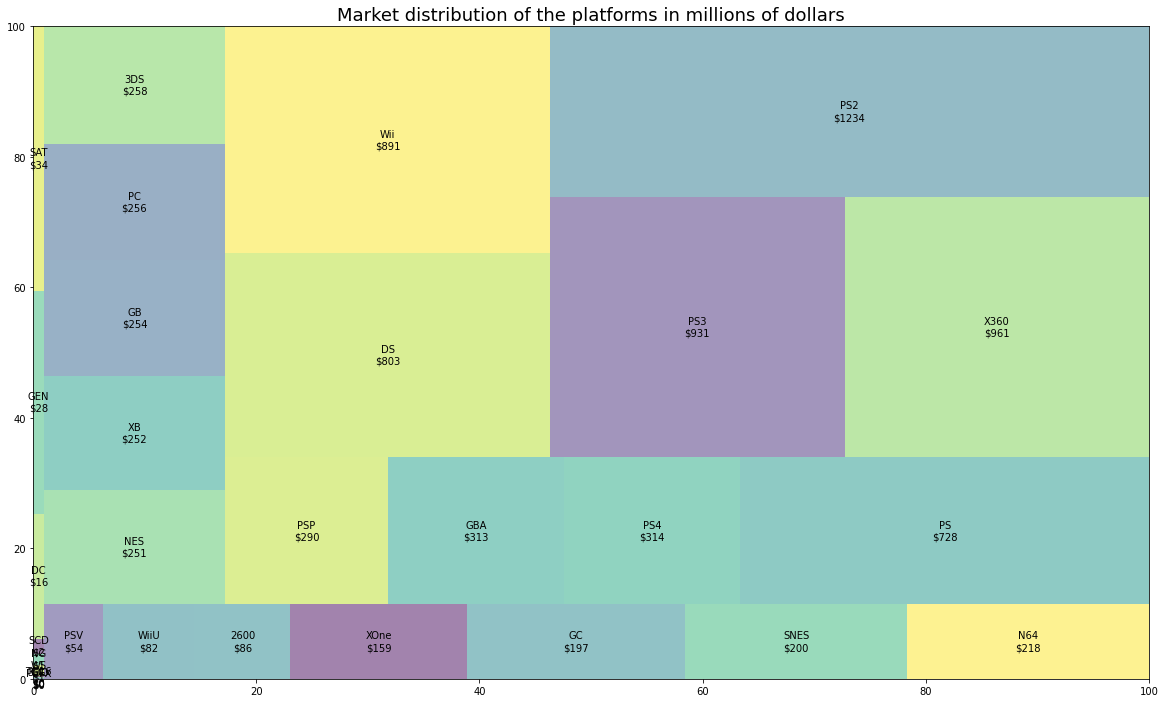

In [235]:
sizes= platform_grp_sales.total_sales_all_regions.values.tolist()
labels = platform_grp_sales.apply(lambda x: str(x[0])+"\n"+"$"+ str(round(x[1])),axis=1)
import squarify  
plt.figure(figsize=(20,12))
squarify.plot(sizes=sizes,label=labels,alpha=0.5)
plt.title("Market distribution of the platforms in millions of dollars",fontdict={'size':18})
plt.show()

Here we can again see the market share how big it is for the respective consoles in millions of dollars. We see that the biggest 6 are the PS2, X360, PS3, Wii and the Nintendo DS. The PS2 has a huge lead over the other consoles at $ 1234 million.
<a name="way1"></a>

In [236]:
platform_group_total_sales=games[['platform','year_of_release','total_sales_all_regions']].groupby(['platform','year_of_release'])['total_sales_all_regions'].sum().reset_index()
platform_group_total_sales.head()#.sample(15)

,platform,year_of_release,total_sales_all_regions
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27


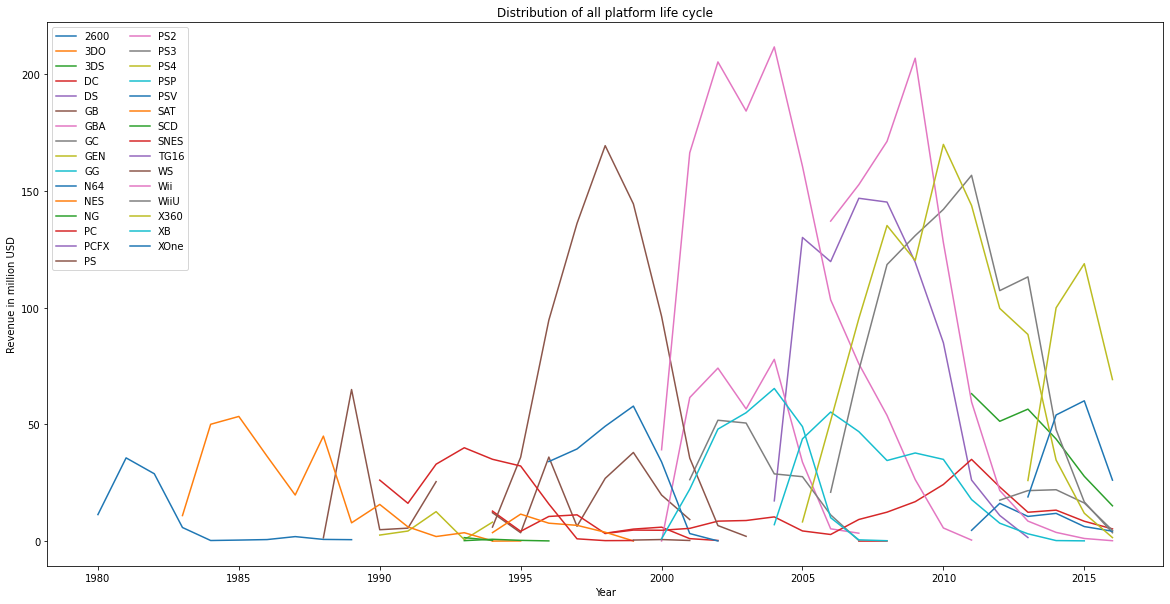

In [237]:
platform_total.pivot_table(index='year_of_release', columns='platform', 
                           values='total_sales_all_regions', aggfunc='sum').plot.line(figsize=(20, 10))

plt.title("Distribution of all platform life cycle");
plt.xlabel("Year");
plt.ylabel("Revenue in million USD");
plt.legend(ncol=2);
plt.show()

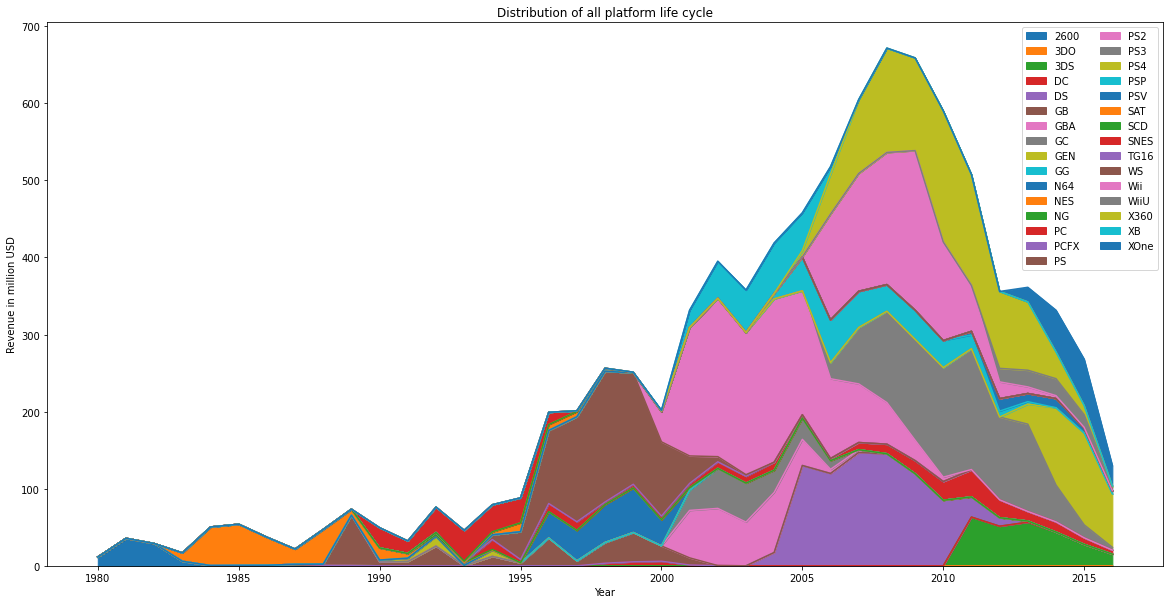

In [238]:
platform_total.pivot_table(index='year_of_release', columns='platform', 
                           values='total_sales_all_regions', aggfunc='sum').plot.area(figsize=(20, 10))

plt.title("Distribution of all platform life cycle");
plt.xlabel("Year");
plt.ylabel("Revenue in million USD");
plt.legend(ncol=2);
plt.show()

There are some, so we should divide it up again otherwise we lose the overview. We divide them according to time periods. But what you can say is that platforms in the later years achieved enormous revenues in some years of over 200 million USD and that it is about a period from 1980 to 2016 

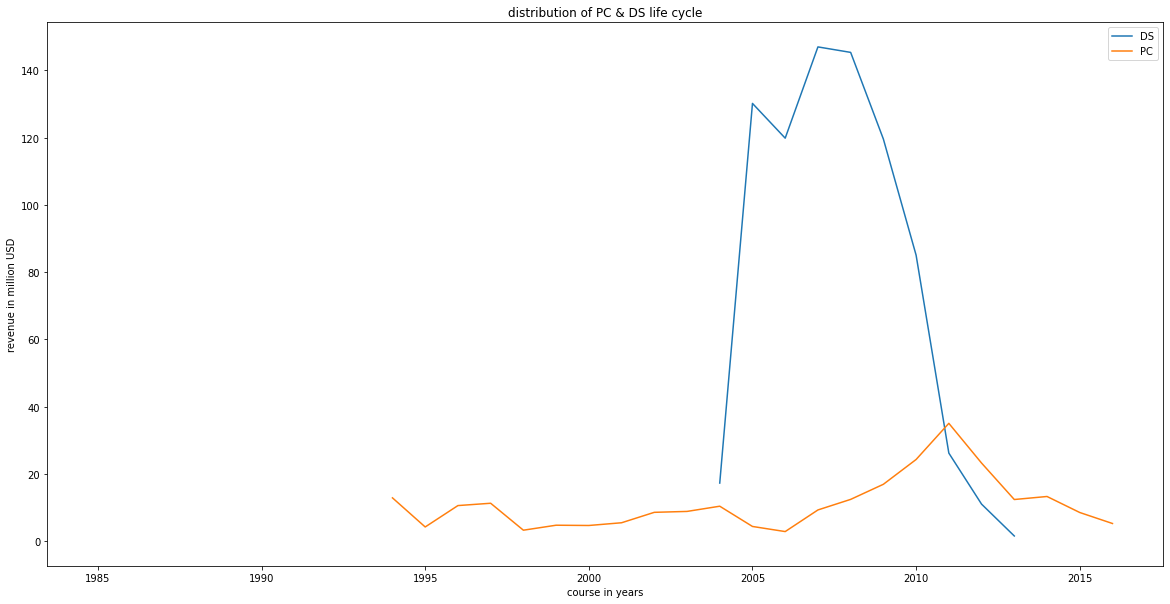

In [239]:
platform_total.pivot_table(index='year_of_release', columns='platform', 
                           values='total_sales_all_regions', aggfunc='sum')[['DS','PC']].plot.line(figsize=(20, 10))
plt.legend(loc="best")
plt.title("distribution of PC & DS life cycle");
plt.xlabel("course in years");
plt.ylabel("revenue in million USD");

We have two with a long period of timefrom 1985 to 2016. The PC has never had the big outlier in comparison if we talk about revenue in million USD, but it has held up and its cycle is not yet over. 

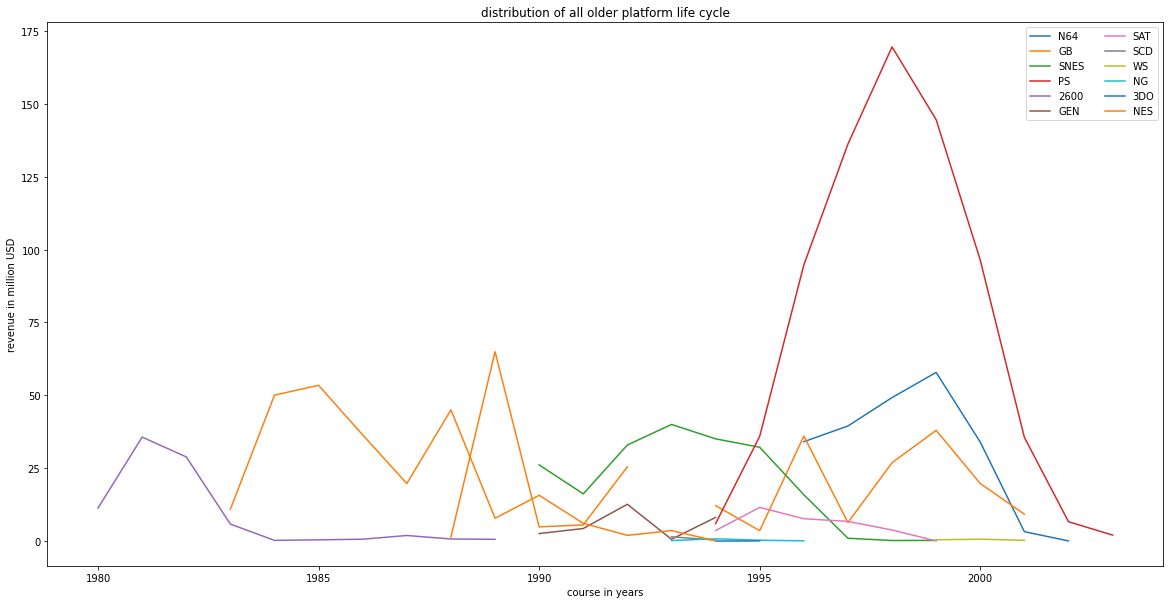

In [240]:
platform_total.pivot_table(index='year_of_release', columns='platform', 
                           values='total_sales_all_regions', aggfunc='sum')[['N64','GB','SNES','PS','2600','GEN','SAT','SCD','WS','NG','3DO','NES']].plot.line(figsize=(20, 10))
plt.legend(loc="best")
plt.title("distribution of all older platform life cycle");
plt.xlabel("course in years");
plt.ylabel("revenue in million USD")
plt.legend(ncol=2);
plt.show()

Then we have old platforms up to ones that had their cycle until the beginning of the 2000s. Where we can also see that the platforms increase as the years progress and especially the income, what will be the reason for the increase everyone wants a piece of the cake.  

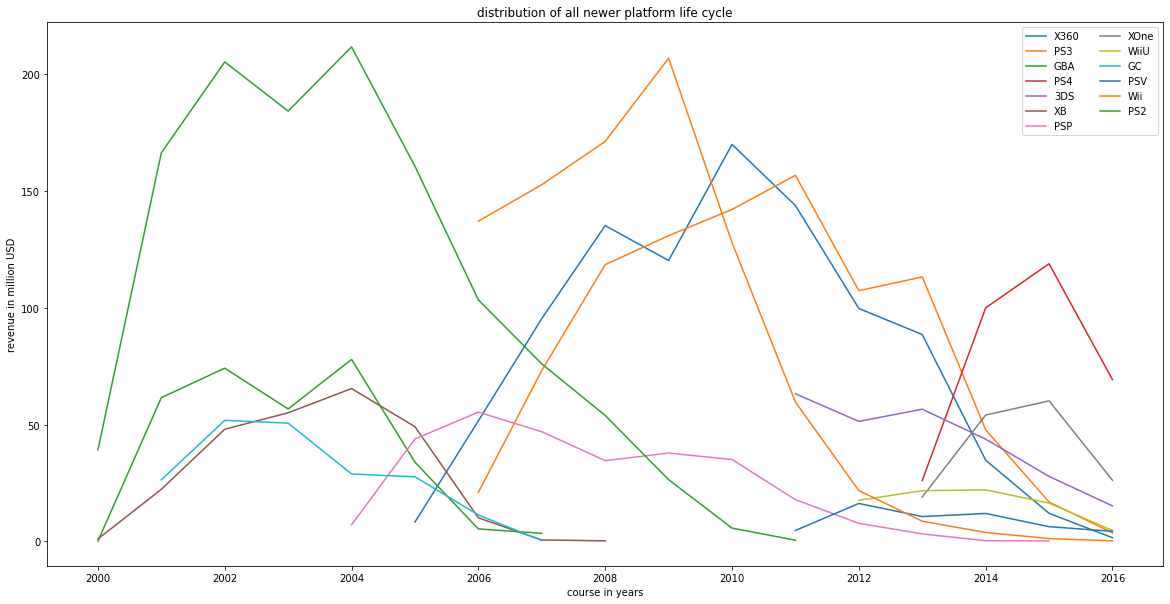

In [241]:
platform_total.pivot_table(index='year_of_release', columns='platform', 
                           values='total_sales_all_regions', aggfunc='sum')[['X360','PS3','GBA','PS4','3DS','XB','PSP','XOne','WiiU','GC','PSV','Wii','PS2']].plot.line(figsize=(20, 10))
plt.legend(loc="best")
plt.title("distribution of all newer platform life cycle");
plt.xlabel("course in years");
plt.ylabel("revenue in million USD");
plt.legend(ncol=2);

And last but not least, we have the new platforms here we see that the income has increased even further and there are even more different platforms. 

**Conclusion:**  

We got an overview of the PS2 the most profitable platform and than I have an overview  of all other platforms together and  some in time segments for a better overview. On the distributions we can see the life cycles of all platforms. Some have a longer one and some have a shorter one. I have described the life cycle of the PS2 in more detail. 

<a name="Step_3.3"></a> 
**Step 3. Analyze the data**  

   * Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.   

Back to the table of contents [click here](#table_of_contents)         

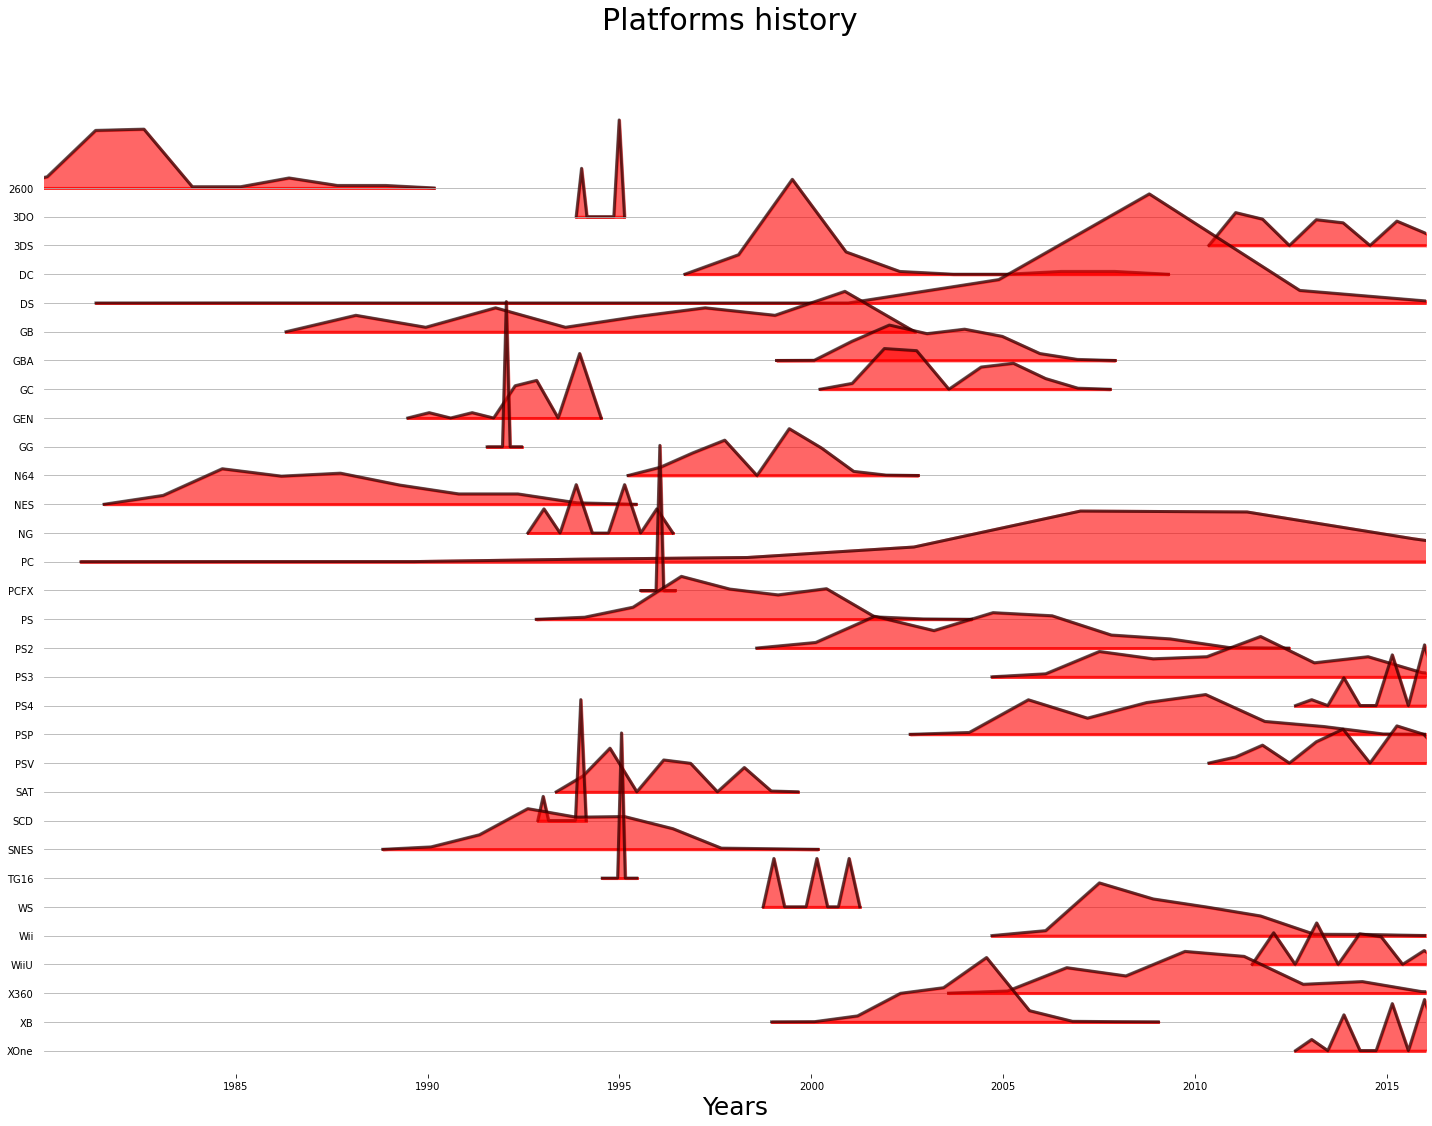

In [242]:
fig, axes = joypy.joyplot(platform_total,column=['year_of_release'],by='platform',range_style='own', x_range=(1980,2016), 
                          grid="y",kind="normalized_counts",linewidth=3,alpha=0.6, legend=False, figsize=(20,15),color=('r'), overlap=3);
plt.title('Platforms history ', fontsize=30);
plt.rc("font", size=15);
plt.xlabel('Years',  fontsize=25);
plt.ylabel('Platform', fontsize=20);

To give us an overview of the period in which the platforms were active. I created a joy plot here. So that you get a better idea on which part of the year we should focus. So that we can make a forecast for 2017. 

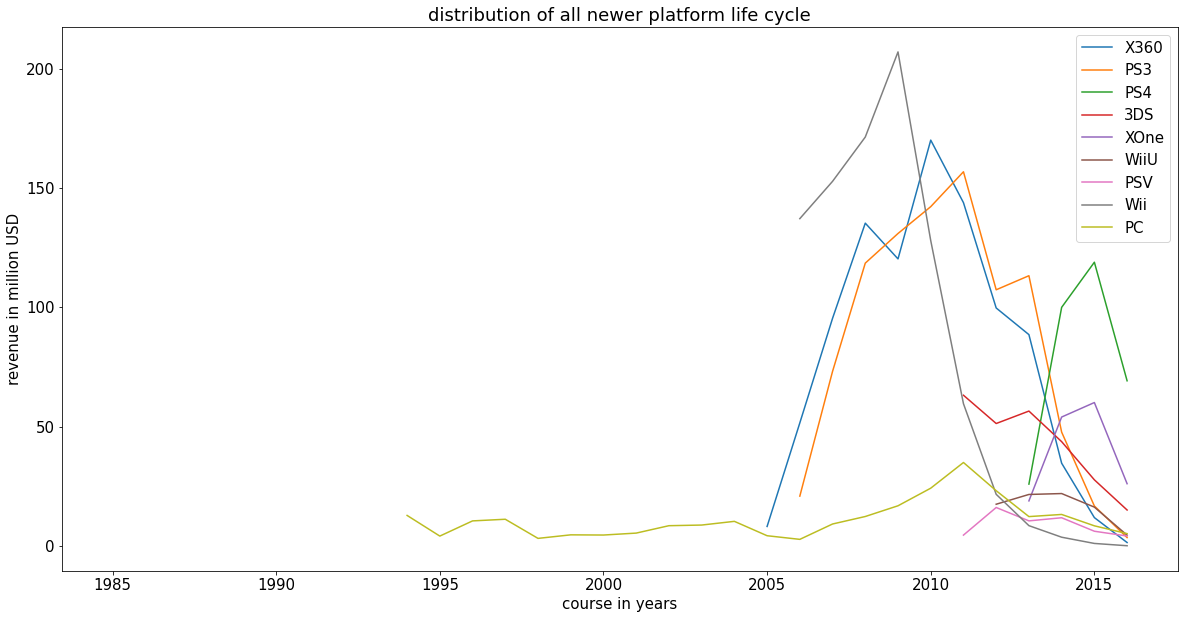

In [243]:
platform_total.pivot_table(index='year_of_release', columns='platform', 
                           values='total_sales_all_regions', aggfunc='sum')[['X360','PS3','PS4','3DS','XOne','WiiU','PSV','Wii','PC']].plot.line(figsize=(20, 10))
plt.legend(loc="best")
plt.title("distribution of all newer platform life cycle");
plt.xlabel("course in years");
plt.ylabel("revenue in million USD");

I've made a compilation of platforms where I think they could be important. If you look at the platforms, 2017 doesn't look particularly attractive. I took the PC with to the distribution of the new platforms because even if its income is not particularly high it has an apparently slow increase that is always marked by setbacks, but you could perhaps see a further increase here in 2017 because the curve is becoming flatten this will be probably  a sign of a turn in the curve. The Xbox 360, PS3 and Wii revenues seem to have reached the end of their life cycle. With its successors, the PS4 and Xbox One, the demand does not seem to be as high as with their predecessors. The market looks very saturated. You could perhaps change the direction of the curve, which is currently moving very strongly downwards, with a particularly well-received game, since this has already worked before, but this would not last long unless you would add more good games or you get a lucky hit and produce exactly what everyone wants. At the moment, the forecasts don't look particularly promising. 

In [244]:
lifespan = platform_group_total_sales[platform_group_total_sales['year_of_release']>=2000]
platform_lifespan = pd.pivot_table(lifespan,index='year_of_release',columns='platform',values='total_sales_all_regions',aggfunc='sum',fill_value=0)
platform_lifespan.T-platform_lifespan.T.shift(+1,axis=1)

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
3DS,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.20,-11.84,5.21,-12.81,-15.98,-12.64
DC,NaN,-4.92,-0.78,-0.29,0.00,0.00,0.00,0.02,0.02,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,NaN,0.00,0.00,0.00,17.27,112.87,-10.33,27.13,-1.63,-25.77,-34.52,-58.84,-15.17,-9.47,-1.54,0.00,0.00
GB,NaN,-10.52,-9.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,NaN,61.46,12.63,-17.49,21.24,-44.05,-28.58,-1.88,-3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,NaN,26.34,25.47,-1.20,-21.79,-1.20,-16.36,-10.99,-0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
N64,NaN,-30.72,-3.17,-0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PC,NaN,0.81,3.10,0.27,1.55,-6.02,-1.52,6.43,3.14,4.49,7.37,10.75,-11.81,-10.84,0.90,-4.76,-3.27
PS,NaN,-60.78,-28.92,-4.60,-2.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


I have now created a list of the consoles that were introduced from the year 2000 and their profit history in order to better predict the forecast for 2017. As explained above, it doesn't look particularly good based on the distribution, but it may be that we are still missing data from 2016 that still need to be added so we can take another look at the course of the total_sales_all_regions from 2000 to 2016 on the current platform. The minus values show how far the value has dropped compared to the previous year.

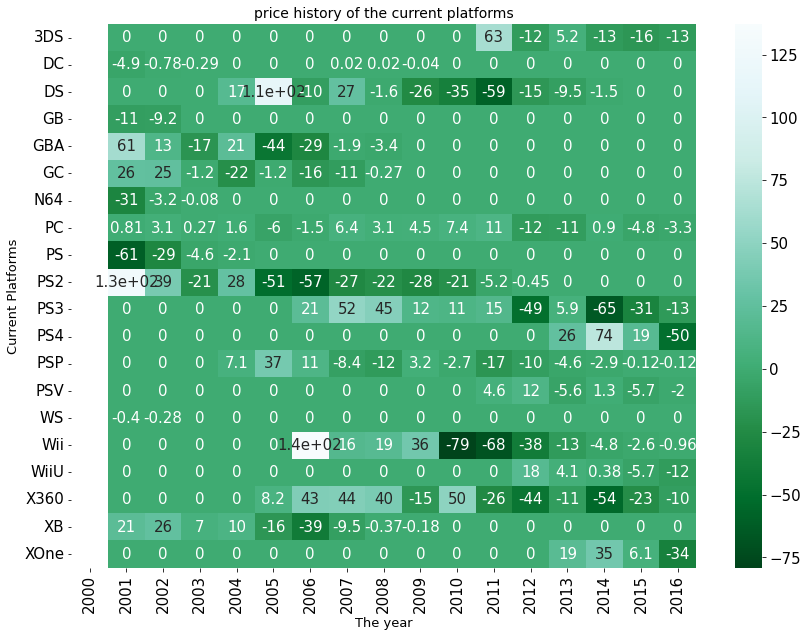

In [245]:
price_history =platform_lifespan.T-platform_lifespan.T.shift(+1,axis=1)
plt.figure(figsize=(14,10));
sns.heatmap(price_history ,cmap='BuGn_r',annot=True,);
plt.title("price history of the current platforms",fontdict={'size':14});
plt.xlabel("The year",fontdict={'size':13});
plt.ylabel("Current Platforms",fontdict={'size':13});

**Conclusion:**  

Here we see a heat map that shows us the price trend for the current consoles from 2001 onwards. The darker the green, the worse the price trend, the brighter the better the trend. We see that in 2016 with the current numbers 10 consoles still have an active market share. These are from Nintendo the 3DS, Wii, WiiU then the PC, from Sony the PS3, PS4, PSP, PSV, and from Microsoft the XBox 360 and the XBox One. This means that Sony currently has the largest share of active consoles. In second place is Nintendo, then Microsoft and then the PC. We are referring to what we have in terms of current numbers. The numbers can still be incomplete. Even so, the current numbers don't look particularly promising. The economic crisis in 2016 can be clearly seen.  
As we can see from the graph on the PS4 and the XOne, the course is very dark green, but the numbers still stand above the other consoles. In addition, the PC is flattening from the blackening process, so we will also look at the PC. 

<a name="Step_3.4"></a> 
**Step 3. Analyze the data**  
 
  * Work only with the data that you've decided is relevant. Disregard the data for previous years.  
  
Back to the table of contents [click here](#table_of_contents)           

We are now concentrating on the years from 2001 to 20016. Although the PS4 fell by 49.65 million dollars in 2016, it is still in the plus since it earned 118.9 million in the previous years and Sony is the most successful manufacturer on the platform market. The PS4 is currently the best that the manufacturer has to offer so we will focus on it. In addition, on the big competitor Microsoft, whose current top console is the Xbox One, it fell by 33.99 million dollars in 2016 but earned 60.14 million in the years before. We also want to look at the PC that has never made the extreme yelps over the years, but has outlasted all of them and became more and more successful millions have been the curve is flattening out. The enormous deterioration is probably due to the economic crisis which makes the whole thing more difficult for the gaming industry. Still, we don't know whether we already have all the data. 

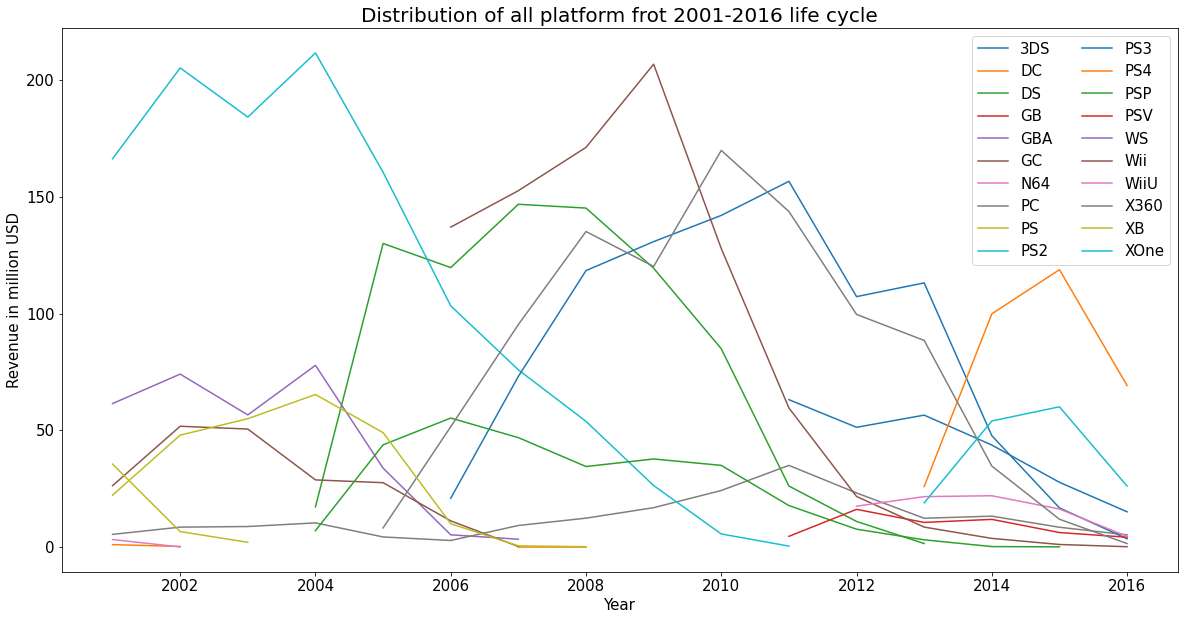

In [246]:
platform_total2001 = platform_total[platform_total['year_of_release']>2000]
platform_total2001 
platform_total2001.pivot_table(index='year_of_release', columns='platform', 
                           values='total_sales_all_regions', aggfunc='sum').plot.line(figsize=(20, 10))

plt.title("Distribution of all platform frot 2001-2016 life cycle",fontsize=20);
plt.xlabel("Year",fontsize=15);
plt.ylabel("Revenue in million USD",fontsize=15);
plt.legend(ncol=2)
plt.show()

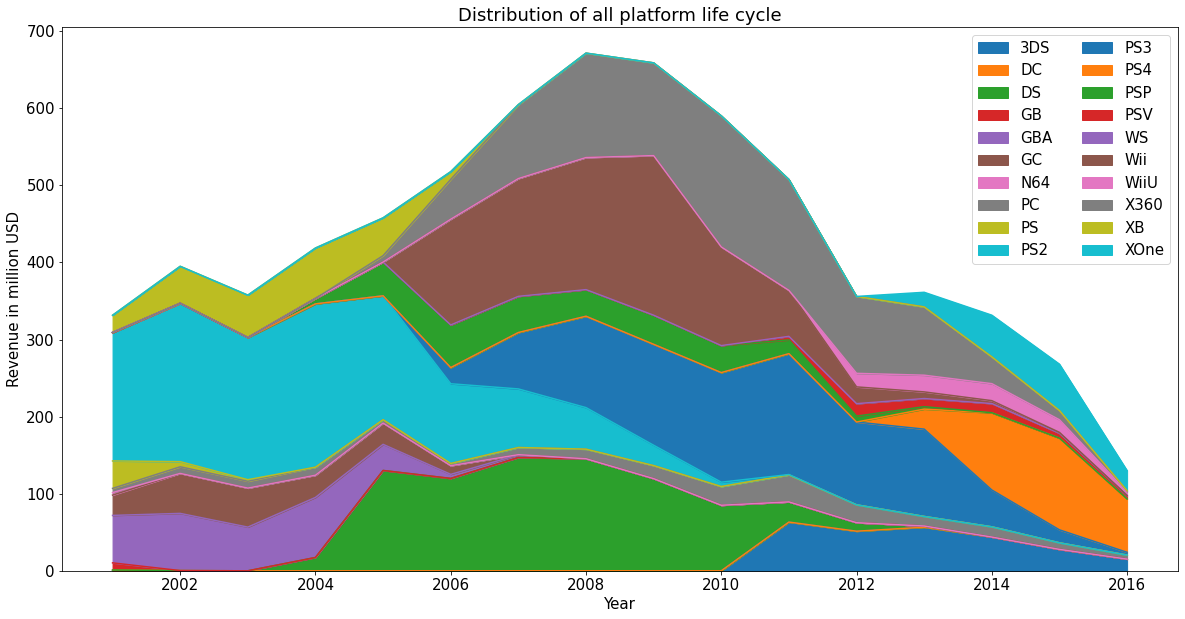

In [247]:
platform_total2001.pivot_table(index='year_of_release', columns='platform', 
                           values='total_sales_all_regions', aggfunc='sum').plot.area(figsize=(20, 10))

plt.title("Distribution of all platform life cycle");
plt.xlabel("Year");
plt.ylabel("Revenue in million USD");
plt.legend(ncol=2)
plt.show()

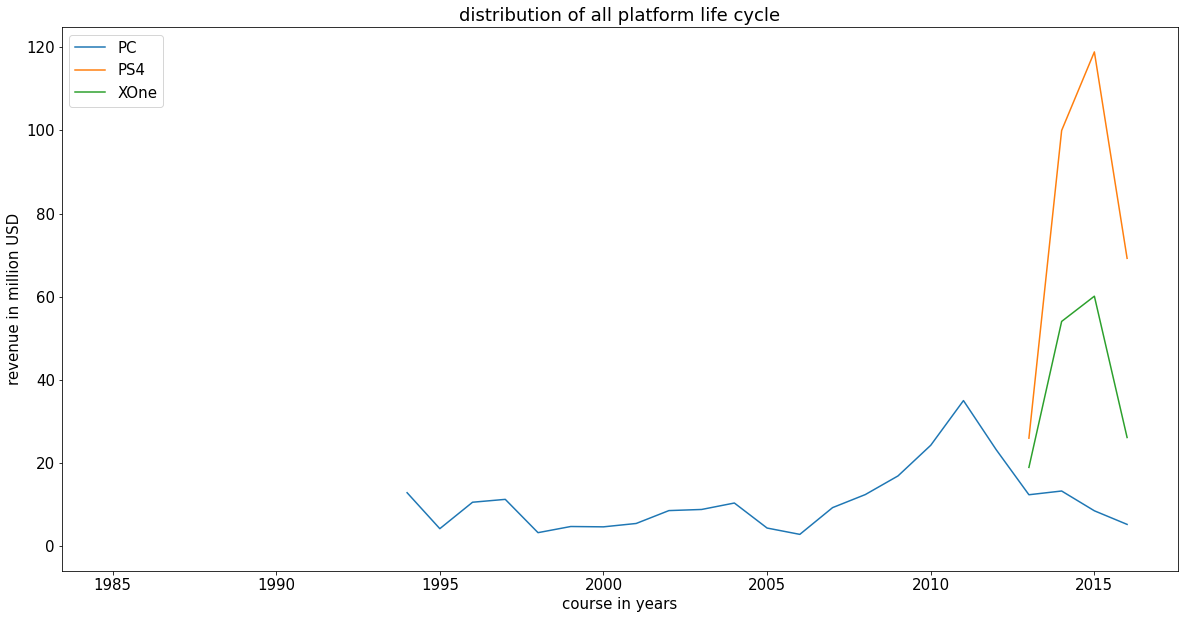

In [248]:
platform_total.pivot_table(index='year_of_release', columns='platform', 
                           values='total_sales_all_regions', aggfunc='sum')[['PC','PS4','XOne']].plot.line(figsize=(20, 10))
plt.legend(loc="best")
plt.title("distribution of all platform life cycle",fontsize=18);
plt.xlabel("course in years",fontsize=15);
plt.ylabel("revenue in million USD",fontsize=15);

**Conclusion:** 

these are the dates that, in my opinion, have the most prospects for the PC, as it could possibly increase further in the future and its probable low point has just been reached, so one upswing would be the next. Then the two most successful consoles that are currently going steeply downwards, but with a good game they could generate huge income again because they have a long-standing affluent community which of course only buys when they get something. The problem is that the market seems oversaturated so it is not a market where there is high demand that makes it all more difficult. On the conclusion above, we looked at the 3 consoles that are interesting from my point of view in relation to the total market.

<a name="Step_3.5"></a> 
**Step 3. Analyze the data**  

  * Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.    

Back to the table of contents [click here](#table_of_contents) 

We are only concentrating on the stock market from 2001 to 2016.

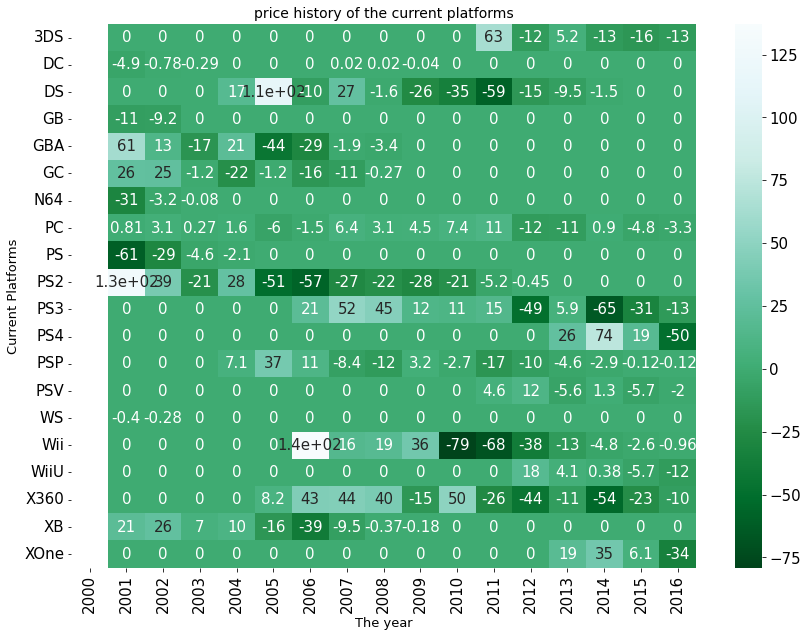

In [249]:
price_history =platform_lifespan.T-platform_lifespan.T.shift(+1,axis=1)
plt.figure(figsize=(14,10));
sns.heatmap(price_history ,cmap='BuGn_r',annot=True,);
plt.title("price history of the current platforms",fontdict={'size':14});
plt.xlabel("The year",fontdict={'size':13});
plt.ylabel("Current Platforms",fontdict={'size':13});

Here we could see which consoles were how successful in the period from 2001 to 2016. Now let's look again at the total share of the market in comparison to see how large the proportion of active consoles is. 

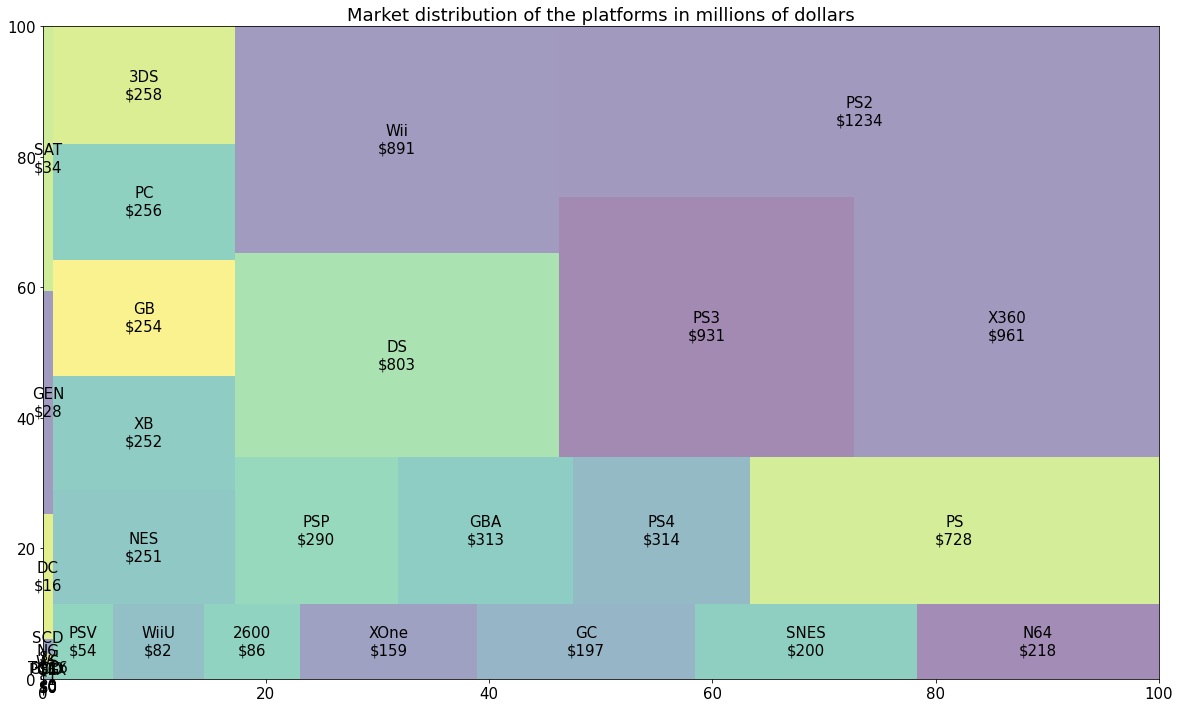

In [250]:
sizes= platform_grp_sales.total_sales_all_regions.values.tolist()
labels = platform_grp_sales.apply(lambda x: str(x[0])+"\n"+"$"+ str(round(x[1])),axis=1)
import squarify  
plt.figure(figsize=(20,12))
squarify.plot(sizes=sizes,label=labels,alpha=0.5)
plt.title("Market distribution of the platforms in millions of dollars",fontdict={'size':18})
plt.show()

We look again at the 4 competing platforms / manufacturers on Nintendo, Microsoft, Sony and the PC 

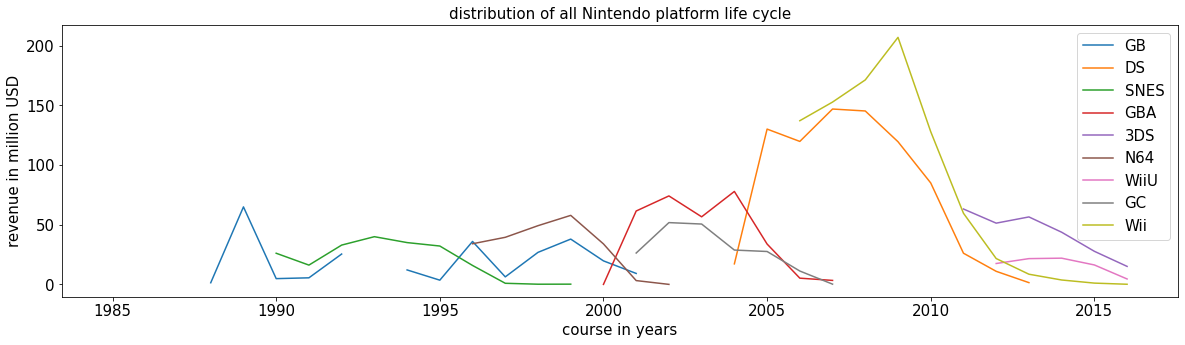

In [251]:
platform_total.pivot_table(index='year_of_release', columns='platform', 
                           values='total_sales_all_regions', aggfunc='sum')[['GB','DS','SNES','GBA','3DS','N64','WiiU','GC','Wii']].plot.line(figsize=(20, 5))
plt.legend(loc="best")
plt.title("distribution of all Nintendo platform life cycle",fontsize=15);
plt.xlabel("course in years",fontsize=15);
plt.ylabel("revenue in million USD",fontsize=15);

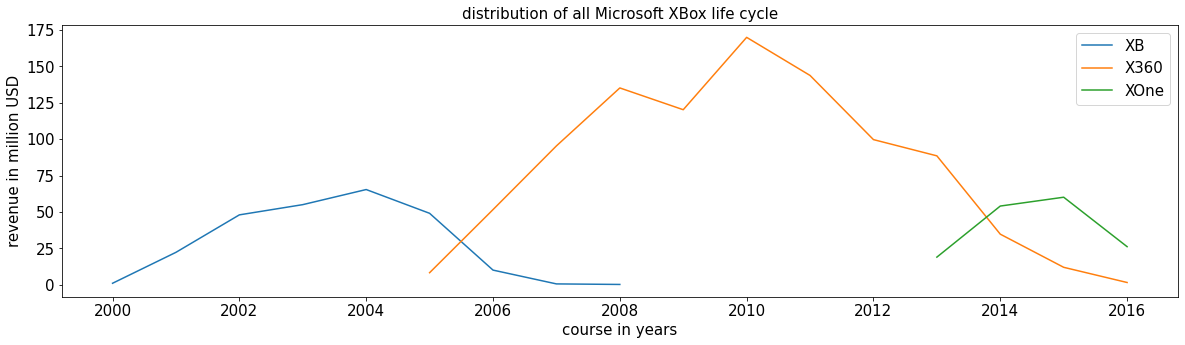

In [252]:
platform_total.pivot_table(index='year_of_release', columns='platform', 
                           values='total_sales_all_regions', aggfunc='sum')[['XB','X360','XOne']].plot.line(figsize=(20, 5))
plt.legend(loc="best")
plt.title("distribution of all Microsoft XBox life cycle",fontsize=15);
plt.xlabel("course in years",fontsize=15);
plt.ylabel("revenue in million USD",fontsize=15);

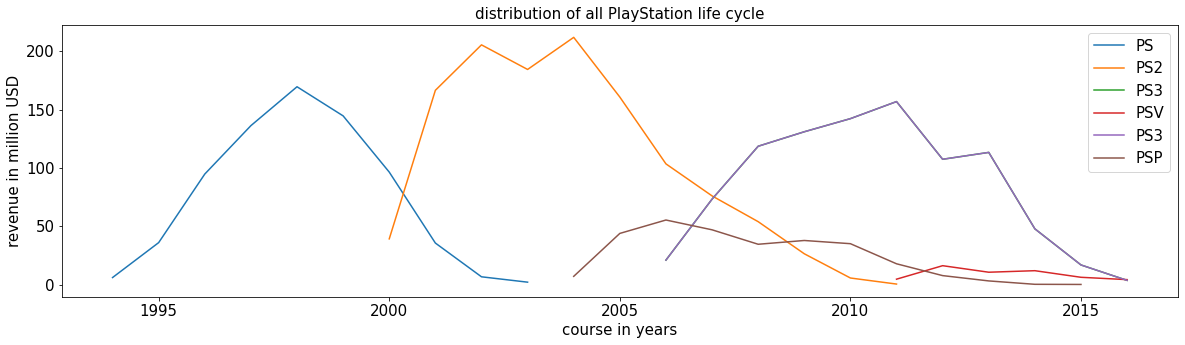

In [253]:
platform_total.pivot_table(index='year_of_release', columns='platform', 
                           values='total_sales_all_regions', aggfunc='sum')[['PS','PS2','PS3','PSV','PS3','PSP']].plot.line(figsize=(20, 5))
plt.legend(loc="best")
plt.title("distribution of all PlayStation life cycle",fontsize=15);
plt.xlabel("course in years",fontsize=15);
plt.ylabel("revenue in million USD",fontsize=15);

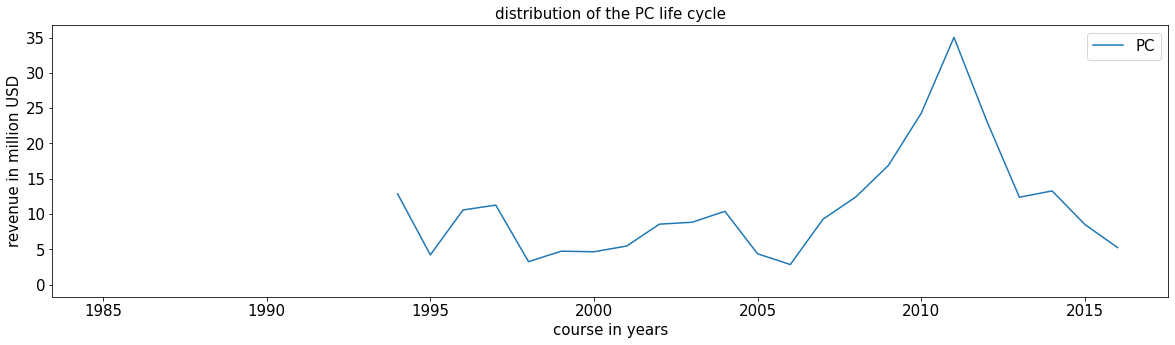

In [254]:
platform_total.pivot_table(index='year_of_release', columns='platform', 
                           values='total_sales_all_regions', aggfunc='sum')[['PC']].plot.line(figsize=(20, 5))
plt.legend(loc="best")
plt.title("distribution of the PC life cycle",fontsize=15);
plt.xlabel("course in years",fontsize=15);
plt.ylabel("revenue in million USD",fontsize=15);

**Conclusion:** 

The largest manufacturers are Nintendo whose greatest success here is the wii and then they have a long history and experience that you can fall back on, but currently there is no nintendo platform on the market that promises success. Their tactic is to bring out many but also very short-lived consoles except for the DS. Then there are the two big competitors Microsoft with the Xbox and the Playstation which achieved the greatest success of all consoles when you look at the revenues. Whereby the current consoles are just a steep downward trend. Finally, there is the old rock, the PC, which continues to gain in importance and has currently reached its lowest point.  
The PlayStation had the biggest success there the entry would be good or one could hope for a new Nintendo here are also good chances the PC keeps increasing and has reached its low point and the Xbox would also be a good choice after the Playstation. 
Nevertheless, it can be said that the PlayStations from Sony had the largest market share in relation to the totaken market and was therefore the leader in sales. Currently, all platforms are falling on the basis of to the economic crisis in 2016. 

<a name="Step_3.6"></a> 
**Step 3. Analyze the data**  
 
  * Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.   

Back to the table of contents [click here](#table_of_contents) 

We will focus here on the new consoles that are relevant for our analysis. 

In [255]:
games_total = games[['platform','games_name','total_sales_all_regions']]
games_total.head()

,platform,games_name,total_sales_all_regions
0,Wii,Wii Sports,82.54
1,NES,Super Mario Bros.,40.24
2,Wii,Mario Kart Wii,35.52
3,Wii,Wii Sports Resort,32.77
4,GB,Pokemon Red/Pokemon Blue,31.38


First we make a list of the things that are important to us and group everything together. 

In [256]:
#sort by console 
#Nintendo
games_Wii = games_total[games_total['platform'] == 'Wii']
games_DS = games_total[games_total['platform'] == 'DS']
games_3DS = games_total[games_total['platform'] == '3DS']
games_WiiU = games_total[games_total['platform'] == 'WiiU']
games_GC = games_total[games_total['platform'] == 'GC']
games_GBA = games_total[games_total['platform'] == 'GBA']
#Microsoft Xbox
games_XB = games_total[games_total['platform'] == 'XB']
games_X360 = games_total[games_total['platform'] == 'X360']
games_XOne = games_total[games_total['platform'] == 'XOne']
#Sony Playstation
games_PS = games_total[games_total['platform'] == 'PS']
games_ps2 = games_total[games_total['platform'] == 'PS2']
games_PSP = games_total[games_total['platform'] == 'PSP']
games_PS3 = games_total[games_total['platform'] == 'PS3']
games_PSV = games_total[games_total['platform'] == 'PSV']
games_PS4 = games_total[games_total['platform'] == 'PS4']
#Personal Computer
games_PC = games_total[games_total['platform'] == 'PC']

In [257]:
#now we sort according to price 
#Nintendo
games_Wii_sales = games_Wii['total_sales_all_regions']
games_DS_sales = games_DS['total_sales_all_regions']
games_3DS_sales = games_3DS['total_sales_all_regions']
games_WiiU_sales = games_WiiU['total_sales_all_regions']
games_GC_sales = games_GC['total_sales_all_regions']
games_GBA_sales = games_GBA['total_sales_all_regions']
#Microsoft Xbox
games_XB_sales = games_XB['total_sales_all_regions']
games_X360_sales = games_X360['total_sales_all_regions']
games_XOne_sales = games_XOne['total_sales_all_regions']
#Sony PlayStation
games_PS_sales = games_PS['total_sales_all_regions']
games_ps2_sales = games_ps2['total_sales_all_regions']
games_PSP_sales = games_PSP['total_sales_all_regions']
games_PS3_sales = games_PS3['total_sales_all_regions']
games_PSV_sales = games_PSV['total_sales_all_regions']
games_PS4_sales = games_PS4['total_sales_all_regions']
#Personal Computer
games_PC_sales = games_PC['total_sales_all_regions']

Now that we have tinkered what we need together, let's take a look at the distribution of the prices achieved by platform by manufacturer. We'll start with the Nintendo. Then we look at the products from Microsoft(XBox), then from Sony(PlayStation) and, last but not least, the primeval rock, the PC. 

The quantile of the Wii platform:
0.25    0.0900
0.50    0.1900
0.75    0.4875
Name: total_sales_all_regions, dtype: float64

The quantile of the DS platform:
0.25    0.05
0.50    0.11
0.75    0.27
Name: total_sales_all_regions, dtype: float64

The quantile of the 3DS platform:
0.25    0.0500
0.50    0.1200
0.75    0.3325
Name: total_sales_all_regions, dtype: float64

The quantile of the WiiU platform:
0.25    0.080
0.50    0.220
0.75    0.525
Name: total_sales_all_regions, dtype: float64

The quantile of the GC platform:
0.25    0.0600
0.50    0.1500
0.75    0.3675
Name: total_sales_all_regions, dtype: float64

The quantile of the GBA platform:
0.25    0.055
0.50    0.160
0.75    0.390
Name: total_sales_all_regions, dtype: float64


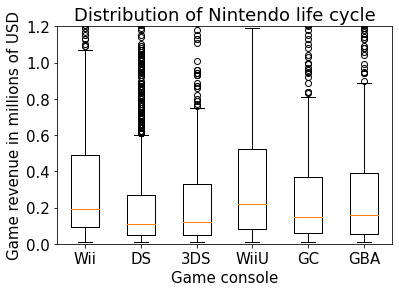

In [258]:
print('The quantile of the Wii platform:')
print(games_Wii['total_sales_all_regions'].quantile([0.25,0.5,0.75]))
print()
print('The quantile of the DS platform:')
print(games_DS['total_sales_all_regions'].quantile([0.25,0.5,0.75]))
print()
print('The quantile of the 3DS platform:')
print(games_3DS['total_sales_all_regions'].quantile([0.25,0.5,0.75]))
print()
print('The quantile of the WiiU platform:')
print(games_WiiU['total_sales_all_regions'].quantile([0.25,0.5,0.75]))
print()
print('The quantile of the GC platform:')
print(games_GC['total_sales_all_regions'].quantile([0.25,0.5,0.75]))
print()
print('The quantile of the GBA platform:')
print(games_GBA['total_sales_all_regions'].quantile([0.25,0.5,0.75]))

plt.ylim(0,1.2)
plt.boxplot([games_Wii_sales,games_DS_sales,games_3DS_sales,games_WiiU_sales,games_GC_sales,games_GBA_sales],
            labels=["Wii","DS","3DS","WiiU","GC","GBA"]);
plt.title("Distribution of Nintendo life cycle");
plt.xlabel("Game console");
plt.ylabel("Game revenue in millions of USD");

Next the XBox from Microsoft. 

The quantile of the XBox platform:
0.25    0.06
0.50    0.15
0.75    0.34
Name: total_sales_all_regions, dtype: float64

The quantile of the XBox360 platform:
0.25    0.11
0.50    0.28
0.75    0.77
Name: total_sales_all_regions, dtype: float64

The quantile of the XBoxOne platform:
0.25    0.060
0.50    0.220
0.75    0.685
Name: total_sales_all_regions, dtype: float64


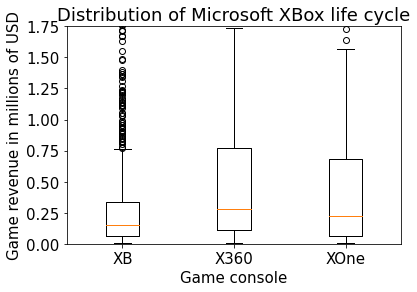

In [259]:
print('The quantile of the XBox platform:')
print(games_XB['total_sales_all_regions'].quantile([0.25,0.5,0.75]))
print()
print('The quantile of the XBox360 platform:')
print(games_X360['total_sales_all_regions'].quantile([0.25,0.5,0.75]))
print()
print('The quantile of the XBoxOne platform:')
print(games_XOne['total_sales_all_regions'].quantile([0.25,0.5,0.75]))

plt.ylim(0,1.75)
plt.boxplot([games_XB_sales,games_X360_sales,games_XOne_sales],
            labels=["XB","X360","XOne"]);
plt.title("Distribution of Microsoft XBox life cycle");
plt.xlabel("Game console");
plt.ylabel("Game revenue in millions of USD");


Now we want to take a look at the Sony PlayStation.

The quantile of the PlayStation platform:
0.25    0.11
0.50    0.26
0.75    0.66
Name: total_sales_all_regions, dtype: float64

The quantile of the PlaySataton2 platform:
0.25    0.08
0.50    0.23
0.75    0.56
Name: total_sales_all_regions, dtype: float64

The quantile of the PlayStation Portable platform:
0.25    0.03
0.50    0.09
0.75    0.23
Name: total_sales_all_regions, dtype: float64

The quantile of the PlayStation3 platform:
0.25    0.11
0.50    0.28
0.75    0.76
Name: total_sales_all_regions, dtype: float64

The quantile of the PlayStation Vita platform:
0.25    0.02
0.50    0.05
0.75    0.13
Name: total_sales_all_regions, dtype: float64

The quantile of the PlayStation4 platform:
0.25    0.06
0.50    0.20
0.75    0.73
Name: total_sales_all_regions, dtype: float64


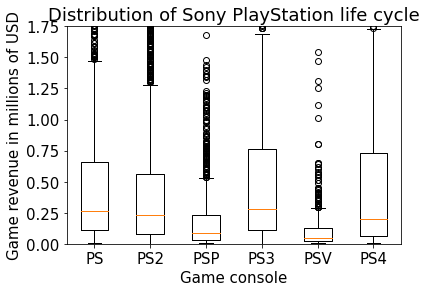

In [260]:
print('The quantile of the PlayStation platform:')
print(games_PS['total_sales_all_regions'].quantile([0.25,0.5,0.75]))
print()
print('The quantile of the PlaySataton2 platform:')
print(games_ps2['total_sales_all_regions'].quantile([0.25,0.5,0.75]))
print()
print('The quantile of the PlayStation Portable platform:')
print(games_PSP['total_sales_all_regions'].quantile([0.25,0.5,0.75]))
print()
print('The quantile of the PlayStation3 platform:')
print(games_PS3['total_sales_all_regions'].quantile([0.25,0.5,0.75]))
print()
print('The quantile of the PlayStation Vita platform:')
print(games_PSV['total_sales_all_regions'].quantile([0.25,0.5,0.75]))
print()
print('The quantile of the PlayStation4 platform:')
print(games_PS4['total_sales_all_regions'].quantile([0.25,0.5,0.75]))

plt.ylim(0,1.75)
plt.boxplot([games_PS_sales,games_ps2_sales,games_PSP_sales,games_PS3_sales,games_PSV_sales,games_PS4_sales],
            labels=["PS","PS2","PSP","PS3","PSV","PS4"]);
plt.title("Distribution of Sony PlayStation life cycle");
plt.xlabel("Game console");
plt.ylabel("Game revenue in millions of USD");

And last but not least our old friend PC. 

The quantile of the Personal Computer platform:
0.25    0.02
0.50    0.05
0.75    0.17
Name: total_sales_all_regions, dtype: float64


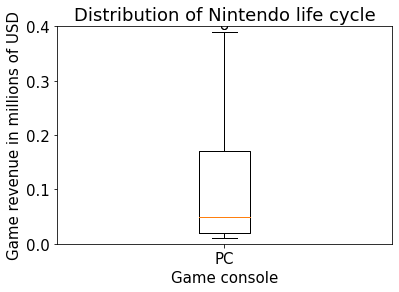

In [261]:
print('The quantile of the Personal Computer platform:')
print(games_PC['total_sales_all_regions'].quantile([0.25,0.5,0.75]))

plt.ylim(0,0.4)
plt.boxplot([games_PC_sales],
            labels=["PC"]);
plt.title("Distribution of Nintendo life cycle");
plt.xlabel("Game console");
plt.ylabel("Game revenue in millions of USD");


**Conclusion:**

I have created several box plots in which I sorted by manufacturer and grouped the prices for the games based on the platform on which they are played. We see that the most expensive games are to be inherited from Microsoft's consoles XBox, although the Xbox games are a bit more expensive than those of the PlaySatation. But you can see that the prices of the two newer XBox types are significantly more expensive than the older one. With the PlayStation it depends on the platform the games of the PSP and the PSV are significantly cheaper than those of the home consoles. The Nintendo games are significantly cheaper than the other two manufacturer. The games for the PC are the cheapest. 

<a name="Step_3.7"></a> 
**Step 3. Analyze the data**  

 
  * Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.    

Back to the table of contents [click here](#table_of_contents) 

In [262]:
score_total = games[['platform','critic_score','user_score','total_sales_all_regions']]
score_total.head()

,platform,critic_score,user_score,total_sales_all_regions
0,Wii,76.0,8.0,82.54
1,NES,NaN,14.0,40.24
2,Wii,82.0,8.3,35.52
3,Wii,80.0,8.0,32.77
4,GB,NaN,14.0,31.38


We want to take another look at the PlayStation 2 as it was the most successful platform and see what impact the ratings had on your financial success. 

In [263]:
score_total_PS2 = score_total[score_total['platform']=='PS2']
score_total_PS2.head()

,platform,critic_score,user_score,total_sales_all_regions
17,PS2,95.0,9.0,20.81
24,PS2,95.0,8.7,16.15
28,PS2,95.0,8.4,14.97
38,PS2,97.0,8.5,13.10
48,PS2,89.0,8.5,11.65


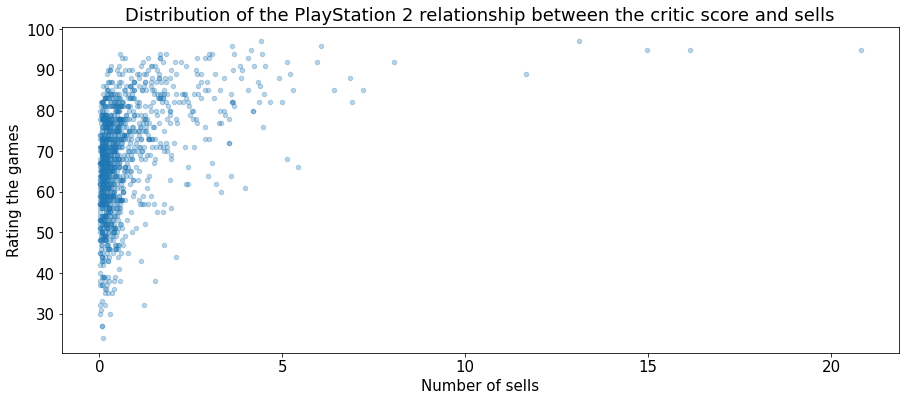

In [264]:
score_total_PS2.plot(x="total_sales_all_regions",y="critic_score",kind="scatter",alpha=0.3,figsize=(15,6));
plt.title("Distribution of the PlayStation 2 relationship between the critic score and sells");
plt.xlabel("Number of sells");
plt.ylabel("Rating the games");

It looks like a few games that are better rated also sell better. This does not necessarily have to depend on the rating, but it is likely that better games are bought more than games that are not particularly good.   
Nevertheless, a rating is always individual and the whole thing is a matter of taste and we don't know which criteria are used to evaluate the rating.  

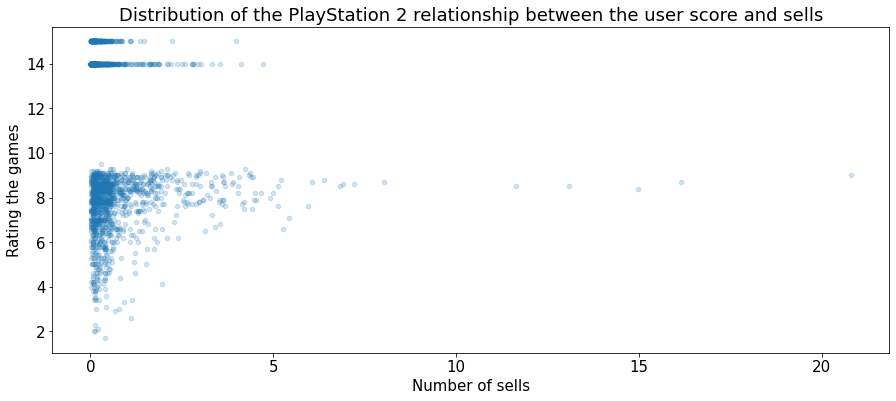

In [265]:
score_total_PS2.plot(x="total_sales_all_regions",y="user_score",kind="scatter",alpha=0.2,figsize=(15,6));
plt.title("Distribution of the PlayStation 2 relationship between the user score and sells");
plt.xlabel("Number of sells");
plt.ylabel("Rating the games");

Here we have to note that 14 and 15 are not to be evaluated in the evaluation score because our Nan = 14 and our tbd = 15 values are. all other values can be used for our conclusions. We can ofe course exclude them. 

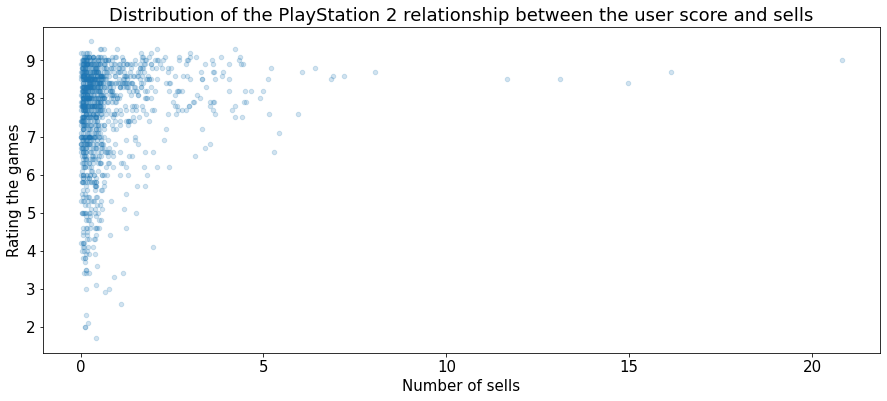

In [266]:
PS2_user_score_only_relevant = score_total_PS2[score_total_PS2["user_score"]<=10]
PS2_user_score_only_relevant.plot(x="total_sales_all_regions",y="user_score",kind="scatter",alpha=0.2,figsize=(15,6));
plt.title("Distribution of the PlayStation 2 relationship between the user score and sells");
plt.xlabel("Number of sells");
plt.ylabel("Rating the games");

Looks better. Now we only have the values that we want to focus on.   


We should now look whether the values have a dependency relationship, a so-called correlation. The interdependence of two values is known as correlation. We want to know whether the purchases depend on the ratings or not. It's one thing to look at a graph, but we'll also need a numerical way to describe correlation. Therefore we want to calculate the correlation. The calculation is pretty simple. First of all we want to calculate the dependency on purchases and the critic score and then to the user score.   

In [267]:
print('correlation coefficient between total sales and critic_score of the PS2:',score_total_PS2['total_sales_all_regions'].corr(score_total_PS2['critic_score']))
print()
print('correlation coefficient between total sales and user_score of the PS2:',PS2_user_score_only_relevant['total_sales_all_regions'].corr(PS2_user_score_only_relevant['user_score']))

correlation coefficient between total sales and critic_score of the PS2: 0.3925364754450902

correlation coefficient between total sales and user_score of the PS2: 0.1750550277038374


**Conclusion:**

The correlation coefficient tells us how much one value changes when the other changes. It takes values from -1 to 1.

 *   If one values increases together with the other, the Pearson correlation coefficient is positive.
 *   If one remains the same when the other changes, the coefficient is 0.
 *   If one decreases when the other increases, the coefficient is negative.

The closer the coefficient is to -1 or 1, the stronger the dependency. A value close to 0 means that there's a weak connection, while a value of 0 can mean either that there's none or that there's a complex, non-linear connection that the coefficient can't reflect.

Our values both have a slight positive correlation they could be stronger. One would also expect that it is stronger but there are too few values from buy a lot if the reviews are good. As said above, everything is a matter of taste and we don't know how the ratings came about. 

<a name="Step_3.8"></a> 
**Step 3. Analyze the data**  


  * Keeping your conclusions in mind, compare the sales of the same games on other platforms.   

Back to the table of contents [click here](#table_of_contents) 

In [268]:
games_grp_platform = games_total.groupby(['games_name','platform'])['total_sales_all_regions'].value_counts()
games_grp_platform.tail(30) #.unstack()

games_name                      platform  total_sales_all_regions
de Blob 2                       Wii       0.19                       1
                                X360      0.15                       1
echochrome                      PSP       0.09                       1
ef - a fairy tale of the two.   PS2       0.01                       1
everGirl                        GBA       0.07                       1
futureU: The Prep Game for SAT  DS        0.07                       1
htoL#NiQ: The Firefly Diary     PSV       0.01                       1
iCarly                          DS        0.72                       1
                                Wii       0.45                       1
iCarly 2: iJoin The Click!      DS        0.27                       1
                                Wii       0.10                       1
inFAMOUS                        PS3       2.93                       1
inFAMOUS 2                      PS3       1.82                       1
inFAMOUS: S

**Conclusion:** 

If we look at the games and remember the box plots above, we can also see that the games that were made for several platforms different amounts of money depending on the platform. Which suggests that some platforms have a larger community than others.  

**Pro Evolution Soccer 2011**

 * PC   -     0.06  million USD                           
 * PS2  -     0.41  million USD                          
 * PS3  -    2.41  million USD                         
 * PSP  -     0.80  million USD                         
 * Wii  -     0.22  milloin USD                         
 * X360 -     0.60  million USD                         
                                
If we look at pro evolution soccer 2011, for example, we see that the PS3 must have sold a lot more games than the others in order to have achieved this difference in total. So we see that some platforms sell significantly more games than others, as we have already seen above, which can be played from home and are from the 3 big manufacturers Nintendo Microsoft and Sony, with Sony leading the list here, followed by the Xbox Nintendo was especially successful with the Wii. They are also the only manufacturer who had a real success in selling games for mobile devices with the Nintendo DS. Playstation's PSP and PSV only made 1/3 of the maximum winnings that Nintendo DS could make.    


<a name="Step_3.9"></a> 
**Step 3. Analyze the data**  

  * Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?   

Back to the table of contents [click here](#table_of_contents) 

In [269]:
games.head()

,games_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating2,total_sales_all_regions
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,14.0,NaN,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,14.0,NaN,T,31.38


Genre total wins in millions of USD:
genre
Action          1716.52
Adventure        233.33
Fighting         442.66
Misc             790.29
Platform         825.55
Puzzle           239.89
Racing           723.49
Role-Playing     931.08
Shooter         1041.36
Simulation       387.96
Sports          1309.67
Strategy         172.57
Name: total_sales_all_regions, dtype: float64


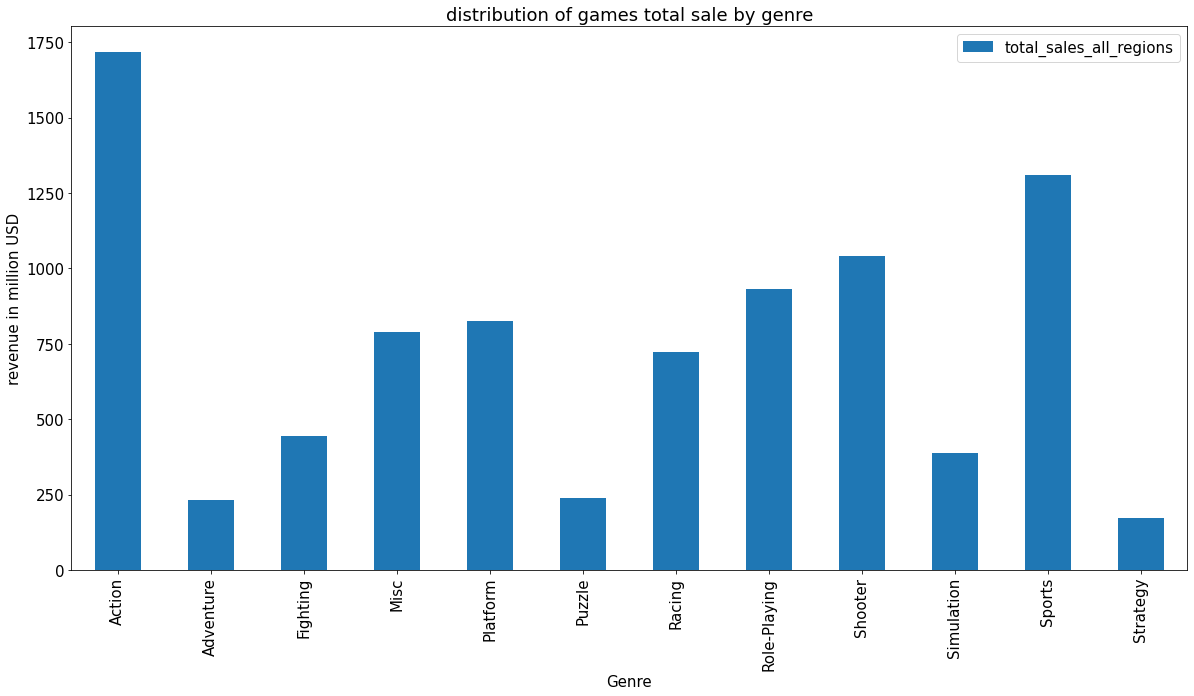

In [270]:
genre_grp_games_sum = games.groupby(['genre'])['total_sales_all_regions'].sum()
print('Genre total wins in millions of USD:')
print(genre_grp_games_sum)
genre_grp_games_sum.plot(kind='bar',figsize=(20,10));
plt.legend(loc="best")
plt.title("distribution of games total sale by genre");
plt.xlabel("Genre");
plt.ylabel("revenue in million USD");

In [271]:


genre_grp_games_sum = games.groupby(['genre'])['total_sales_all_regions'].sum().sort_values(ascending=False)

ax = genre_grp_games_sum.plot(kind='bar',figsize=(20,10), rot=45)
plt.legend(loc="best")
plt.title("distribution of games total sale by genre")
plt.xlabel("Genre");
plt.ylabel("revenue in million USD")


    height = item.get_height()
    ax.annotate('{:.0f}'.format(height),
            xy=(item.get_x() + item.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')
plt.show()

IndentationError: unexpected indent (<ipython-input-271-7fa14140bdd2>, line 10)

**Conclusion:** 

Here we see that the total revenue that is distributed across the genres. Action is the genre with the highest total earnings followed by sport. The lowest total earnings were achieved by adventure, puzzle and strategy, but simulation is also a genre with lower total earnings.   
Können Sie Genres mit hohen und niedrigen Verkäufen verallgemeinern? 
No we should always take a closer look at everything and and ask us you can never know what kind of opportunities or dangers there are hiding behind such generalizations. For example, there can be only a few games in individual genres compared to others and they have to sell a lot more to reach the same. We could still look it up, but if it comes down to the number of pieces we would have to contact Ice again. For example, it could be that a certain game can be sold much more expensive but is cheap to produce. 
Then maybe it is better to go to this market than to one where the suppliers have to undercut each other to get a piece of the cake. Because there are so many different and the choice is very large. 
We saw this above with the platforms there are some that make a lot of different ones like Nintendo and then there are others that focus on one like Microsoft.   

To make this clear I have turned the number of games in compared to sales into a graph below. If we look at shooter in comparison role-playing games we see that more sales profits were made although there are fewer games. Whether this has a moral background of the game manufacturer that they produce less shooters or why they pay more or more people buy these games(that's the thing we don't know where we have to ask again at Ice). Everything illegal or with restrictions is more interesting for the public philosophy.  
Maybe a market for and unless we don't want to condescend violence. But first we have to clarify our questions with Ice.  

In [ ]:
genre_grp_games_count = games.groupby(['genre'])['total_sales_all_regions'].count()
print('Number of games by genre:')
print(genre_grp_games_count)
genre_grp_games_count.plot(kind='bar',figsize=(20,10),alpha=0.5,label='number of games');
plt.legend(loc="best")
plt.title("distribution of total games number by genre");
plt.xlabel("Genre");
plt.ylabel("Number of Games");

genre_grp_games_sum.plot(kind='bar',figsize=(20,10),alpha=0.5,label='total profits from sales',cmap='gray');
plt.legend(loc="best")
plt.title("distribution of games total sale by genre");
plt.xlabel("Genre");
plt.ylabel("revenue in million USD");


In [ ]:
genre_grp_games_count = games.groupby(['genre'])['total_sales_all_regions'].count()

fig, ax1 = plt.subplots(figsize=(13, 7))
ax2 = ax1.twinx()

x_labels = genre_grp_games_count.index

genre_grp_games_count.plot.bar(ax=ax1, position=1, width=0.4, cmap='gray', rot=45, label='Games amount')
genre_grp_games_sum.plot.bar(ax=ax2, position=0, width=0.4,label='Revenue')

plt.title('Distribution of games total sale by genre"')
ax1.set_ylabel('Games amount')
ax2.set_ylabel('Revenue in million USD')
ax1.set_xlabel('Game genre')


ax1.legend(loc="upper center")
ax2.legend(loc="upper right")

plt.show()

So then on to the next question. 

<a name="Step_4.1"></a>
**Step 4. Create a user profile for each region**

For each region (NA, EU, JP), determine:

   * The top five platforms. Describe variations in their market shares from region to region.  
   
Back to the table of contents [click here](#table_of_contents)    

We create a new table with the values we need.

In [ ]:
platform_comparison_regions = games[['platform','year_of_release','na_sales','eu_sales','jp_sales']]
platform_comparison_regions

We want to look at each platform individually. 

In [ ]:
games.pivot_table(index='year_of_release', columns='platform', 
                           values='na_sales', aggfunc='sum').plot.line(figsize=(20, 10))
plt.legend(loc="best")
plt.title("distribution of all platform life cycle in North America");
plt.xlabel("course in years");
plt.ylabel("revenue in million USD");
plt.legend(ncol=2);

In [ ]:
games.pivot_table(index='year_of_release', columns='platform', 
                           values='na_sales', aggfunc='sum').plot.area(figsize=(20, 10))

plt.title("Distribution of all platform life cycle");
plt.xlabel("Year");
plt.ylabel("Revenue in million USD");
plt.legend(ncol=2)     
plt.show()

First we look at and north america and which 5 platforms have been most successful there.

When we look at the platforms in North America, we see that the Wii,PS2, Xbox360, PlayStation and the Nintendo DS have been the most successful. The Nintendo DS closely followed by the PS3. The Wii was the most successful, closely followed by the Xbox 360. In contrast to the total worldwide sales, the PS2 was not the most successful platform in North America, below you can be seen more clearly.   
1 - Wii  
2 - X360  
3 - PS2    
4 - PS    
5 - DS  

In [ ]:
#North America
games.pivot_table(index='year_of_release', columns='platform', 
                           values='na_sales', aggfunc='sum')[['DS','X360','PS3','PS','Wii','PS2']].plot.line(figsize=(20, 10))
plt.legend(loc="best")
plt.title("distribution of all platform life cycle in North America");
plt.xlabel("course in years");
plt.ylabel("revenue in million USD");

Now let's take a look at Europe. 

In [ ]:
games.pivot_table(index='year_of_release', columns='platform', 
                           values='eu_sales', aggfunc='sum').plot.line(figsize=(20, 10))
plt.legend(loc="best")
plt.title("distribution of all platform life cycle in Europe");
plt.xlabel("course in years");
plt.ylabel("revenue in million USD");
plt.legend(ncol=2);

In [ ]:
games.pivot_table(index='year_of_release', columns='platform', 
                           values='eu_sales', aggfunc='sum').plot.area(figsize=(20, 10))

plt.title("Distribution of all platform life cycle");
plt.xlabel("Year");
plt.ylabel("Revenue in million USD");
plt.legend(ncol=2)
plt.show()

In europe things look different again here the clear winner is the PS2. The Wii comes in second place, closely followed by the PS3. Fourth place goes to the PS4, closely followed by the PS. Sony is the leader in Europe and is clearly the winner among the platforms with the playstation. But the Xbox360 and Nintendo DS were also successful. You can seen it more clearly below.   
1 - PS2  
2 - Wii  
3 - PS3  
4 - PS4  
5 - PS  

In [ ]:
games.pivot_table(index='year_of_release', columns='platform', 
                           values='eu_sales', aggfunc='sum')[['DS','X360','PS3','PS4','PS','Wii','PS2']].plot.line(figsize=(20, 10))
plt.legend(loc="best")
plt.title("distribution of all platform life cycle in Europe");
plt.xlabel("course in years");
plt.ylabel("revenue in million USD");

Last but not least, let's take a look at the Japanese market. 

In [ ]:
games.pivot_table(index='year_of_release', columns='platform', 
                           values='jp_sales', aggfunc='sum').plot.line(figsize=(20, 10))
plt.legend(loc="best")
plt.title("distribution of all platform life cycle in Japan");
plt.xlabel("course in years");
plt.ylabel("revenue in million USD");

In [ ]:
games.pivot_table(index='year_of_release', columns='platform', 
                           values='jp_sales', aggfunc='sum').plot.area(figsize=(20, 10))

plt.title("Distribution of all platform life cycle");
plt.xlabel("Year");
plt.ylabel("Revenue in million USD");
plt.legend(ncol=2)
plt.show()

The japanese market looks extremely different than the other two here, it is apparent that mobile devices are also extremely successful and you don't play secretly at home so that you are not perceived as a gamer, they seem to be quite open about it. So a real paradise for players. ;P   
By far the most successful device was the Nintendo DS, followed by the PlayStation. The third place is shared by Super Nintendo and Nintendo 3DS, followed by the PS2. Nientendo is ahead in Japan, but the PlayStation is also successful in Japan, the Xbox from microsoft is not at all successful in Japan.  
You can also see it more clearly below.   
1 - DS  
2 - PS  
3/4 - SNES  
3/4 - 3DS  
5 - PS2

In [ ]:
games.pivot_table(index='year_of_release', columns='platform', 
                           values='jp_sales', aggfunc='sum')[['GB','DS','SNES','3DS','PS','PSP','TG16','GG','NES','PS2']].plot.line(figsize=(20, 10))
plt.legend(loc="best")
plt.title("distribution of all platform life cycle in Japan");
plt.xlabel("course in years");
plt.ylabel("revenue in million USD");

**Conclusion:**

The platforms are differently successful in the different markets you can see that in some markets more home consoles are successful in others like japan, even mobile consoles are successful. You can see which manufacturer is successful in most of the markets it is very clear Sony with the Playstation 8 times it was among the most successful 5 but also Nintendo is quite successful 6 times nintendo was among the first 5. Microsoft has only 1 time with the Xbox 360 done in North America. 

<a name="Step_4.2"></a>
**Step 4. Create a user profile for each region**

For each region (NA, EU, JP), determine:

   * The top five genres. Explain the difference.   

Back to the table of contents [click here](#table_of_contents) 

In [ ]:
genre_grp_region_na = games.groupby(['genre'])['na_sales'].sum()
genre_grp_region_eu = games.groupby(['genre'])['eu_sales'].sum()
genre_grp_region_jp = games.groupby(['genre'])['jp_sales'].sum()
print('Total sales of games in Nord America by genre:')
print(genre_grp_region_na)
print()
print('Total sales of games in Europ by genre:')
print(genre_grp_region_eu)
print()
print('Total sales of games in Japan by genre:')
print(genre_grp_region_jp)

In [ ]:
genre_grp_region_na.plot(kind='bar',figsize=(20,10),alpha=0.5,label='total profits from sales Nord America',color='navy');
genre_grp_region_eu.plot(kind='bar',figsize=(20,10),alpha=0.5,label='total profits from sales Europ',color='gold');
genre_grp_region_jp.plot(kind='bar',figsize=(20,10),alpha=0.5,label='total profits from sales Japan',color='green');
plt.legend(loc="best")
plt.title("distribution of games total sale by genre comparison between regions");
plt.xlabel("Genre");
plt.ylabel("revenue in million USD");

**Conclusion:**   

You can roughly say that the europeans and the americans are pretty similar in terms of buying behavior in relation to the genre. The only big difference is that in the american market, double the amount of revenue was made everywhere. This is amazing because there are more people in Europe than in North America. Americans are simply more willing to spend, or the games cost more, or both. The japanese market differs from the other two here was mostly achieved less on the genre comparison japan also has a significantly smaller population than europe and north america we should not forget that. There is only one genre which really stands out and that the Japanese really seems to loooove they seem to love role playing games. otherwise there are no major abnormalities in a quick analysis. 

<a name="Step_4.3"></a>
**Step 4. Create a user profile for each region**

For each region (NA, EU, JP), determine:

   * Do ESRB ratings affect sales in individual regions?  

Back to the table of contents [click here](#table_of_contents) 

In [ ]:
rating_grp_region_na = games.groupby(['rating2'])['na_sales'].sum()
rating_grp_region_eu = games.groupby(['rating2'])['eu_sales'].sum()
rating_grp_region_jp = games.groupby(['rating2'])['jp_sales'].sum()
print('Total sales of games in Nord America by ESRB rating:')
print(rating_grp_region_na)
print()
print('Total sales of games in Europ by ESRB rating:')
print(rating_grp_region_eu)
print()
print('Total sales of games in Japan by ESRB rating:')
print(rating_grp_region_jp)

In [ ]:
rating_grp_region_na.plot(kind='bar',figsize=(10,10),alpha=0.5,label='total profits from sales Nord America',color='linen');
rating_grp_region_eu.plot(kind='bar',figsize=(10,10),alpha=0.5,label='total profits from sales Europ',color='aqua');
rating_grp_region_jp.plot(kind='bar',figsize=(10,10),alpha=0.5,label='total profits from sales Japan',color='c');
plt.legend(loc="best")
plt.title("distribution of games total sale by genre comparison between regions");
plt.xlabel("Genre");
plt.ylabel("revenue in million USD");

Almost like on the mediterranean sea but only almost.(vacation of an analyst in corona time ) 

**Conclusion:**   
    
Most of the income was achieved in the American market with E. M and T almost share the 2 bursts, only the m is a little ahead. With the europeans it looks pretty much the same as with the americans, only that everything is about half less. The Japanese stand out a little from the rest, how could it be otherwise? For them, T is the rating in which the biggest achieved and E shortly behind in 2nd place, followed by M and than E10+. The others are so low that they have no importance. But we must not forget that it also depends on how many games there are in the group, this of course also influences the statistics and the evaluation also what each one costs or how many of them were bought(which we unfortunately do not know).     

<a name="Step_5.1"></a>
**Step 5. Test the following hypotheses:** 

  * Average user ratings of the Xbox One and PC platforms are the same.  

Back to the table of contents [click here](#table_of_contents)       

Formulating hypotheses we always state H0 as an equiation and H1 as a difference.  
H0 == Average user ratings of the Xbox One and PC platforms are the same.   
H1 != Average user ratings of the Xbox One and PC platforms are not the same.   

In [ ]:
score_total_PC1 = score_total[score_total['platform']== 'PC']
score_total_XOne1 = score_total[score_total['platform']== 'XOne']
score_total_PC = score_total_PC1[score_total_PC1['user_score']<=10]
score_total_XOne = score_total_XOne1[score_total_XOne1['user_score']<=10]

alpha = .05#statistical significance level


results = st.ttest_ind(score_total_PC['user_score'] , score_total_XOne['user_score'], equal_var = False)
#is testing the hypothesis that the means of the two are equal (H0) no they are the same is the 0 hypotesis ==

print('p-value:', results.pvalue)#print the p-value

if (results.pvalue < alpha):#compare the p-value with the significance level
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

In [ ]:
display(score_total_PC.head())
display(score_total_XOne.head())

H1 equals P-value which represents our probability. The more similar the two see each other, the less likely it is that our H0 will be reject. In other words than they are the same as our H0 == says. Here the values have to be very similar since we cannot confirm our H1 hypotesis, so we cannot reject our H0.  

I did not expect that but we want to check the whole thing again. 

In [ ]:
print('User score Xbox One mean:',score_total_XOne.user_score.mean())
print('User score PC mean:',score_total_PC.user_score.mean())

Really close to each other our review was a success. 

**Conclusion:**

We have tested the hypothesis and seen that they have an almost identical evaluation, the probability of equality is 85%. 

<a name="Step_5.2"></a>
**Step 5. Test the following hypotheses:** 

  * Average user ratings for the Action and Sports genres are different.   

Back to the table of contents [click here](#table_of_contents)       

As above formulating hypotheses we always state H0 as an equiation and H1 as a difference.    
H0 == Average user ratings for the Action and Sports genres are equal.(ore they are the same in other words)  
H1 != Average user ratings for the Action and Sports genres are different.(ore they are not the same in other words)

In [ ]:
genre_sport_rating1 = games[games['genre']== 'Sports']
genre_action_rating1 = games[games['genre']== 'Action']
genre_sport_rating = genre_sport_rating1[genre_sport_rating1['user_score']<=10]#sorting out the missing values 
genre_action_rating = genre_action_rating1[genre_action_rating1['user_score']<=10]#sorting out the missing values 
alpha = .05#statistical significance level


results = st.ttest_ind(genre_sport_rating['user_score'] , genre_action_rating['user_score'], equal_var = False)
#is testing the hypothesis that the means of the two are equal (H0) no they are the same is the 0 hypotesis ==

print('p-value:', results.pvalue)#print the p-value

if (results.pvalue < alpha):#compare the p-value with the significance level
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Wow a perfect match 100% in other words the two ratings are exactly the same. Let's check that out too.  

In [ ]:
print("Sport user score mean:",genre_sport_rating['user_score'].mean())
print("Action user score mean:",genre_action_rating['user_score'].mean())

As expected, a direct hit the probability P-value that the two ratings are the same is 100% (they also the same).  

**Conclusion:**  

The two user ratings are exactly the same, that means we have confirmed our 0 hypotesis and could not reject it, so we have reject the H1 and cannot confirm the hypotesis of the task (the exact opposite is the case they are twins). 

<a name="way"></a>
**Nonparametric Statistical Hypothesis Test**  

**Kruskal-Wallis H Test:**  

    Test whether the distributions of two or more independent samples are equal or not.

**Assumptions:**  

    Average user ratings for the Action and Sports genres are different. 

**Interpretation:**   

   _(We always state H0 as equal and H1 as a difference.)_


    H0 == Average user ratings for the Action and Sports genres are equal.(ore they are the same in other words)
    H1 != Average user ratings for the Action and Sports genres are different.(ore they are not the same in other words)

In [ ]:
# The Kruskal-Wallis H Test
from scipy.stats import kruskal
genre_sport_rating  
genre_action_rating 
stat, p = kruskal(genre_sport_rating['user_score'], genre_action_rating['user_score'])
print('stat=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

**Conclusion:**   

They are close to each other but not quite the same. the values are slightly different here it now depends on our probability P, which we have determined. How far the values may deviate from each other and from when they are then considered to be different. It becomes clearest when you see the two cross-sections next to each other that they have a small difference but are very close to each other.The values are 6.9 for sport user score mean and 7.0 for action user score mean.

<a name="Step_5.3"></a>
**Step 5. Test the following hypotheses:** 
  
 Set the alpha threshold value yourself.  
 
 Explain:    
 
  * How you formulated the null and alternative hypotheses  
 
Back to the table of contents [click here](#table_of_contents)     

**Conclusion:** 

I took the standert value 5% 
As described above, I always used the 0 hypotest for they are equal to and the 1 Hupotese as the opposite of the 0 hypotest. In other words H0 == and H1 !=. 

<a name="Step_5.4"></a>
**Step 5. Test the following hypotheses:** 
  
 Set the alpha threshold value yourself.  
 
 Explain:    

  * What significance level you chose to test the hypotheses, and why   

Back to the table of contents [click here](#table_of_contents) 

**Conclusion:**   

I chose the standard value of 5%. Because there are decimal numbers if we would take numbers from 1-10 we would have to take at least  10% (1 of 10) to see something. 

<a name="Step_6"></a>
**Step 6. Write a general conclusion**

**Format:** Complete the task in the Jupyter Notebook. Insert the programming code in the code cells and text explanations in the markdown cells. Apply formatting and add headings.

Back to the table of contents [click here](#table_of_contents) 

**Conclusion:**  

in order to do an even more precise analysis we had to consult with ice again whether we could get the exact retail prices and the number of items sold and whether we can clarify what happened to the lost values. You could get a rough overview of the markets and draw rough conclusions, but they don't have 100% accuracy, there are still too many open questions to be able to make a 100% final statement, but we could see that the markets all have their different characteristics and that how with our hypotesis things are sometimes more similar to you than we would suspect at first glance. At the moment the markets look more like they are quite saturated, but there are individual areas where you could rake deeper if you get more information in which there are perhaps still locrative markets for a good advertising campaign. 

Quite a long task with time pressure this time. I am happy about your constructive criticism and a big thank you for your time and effort. 